In [1]:
import pandas as pd
%pylab inline
from datetime import date, datetime, time, timedelta

Populating the interactive namespace from numpy and matplotlib


In [135]:
# get some nice colours and define better legend and plot formatting...

c_p = {'rd2': (0.9647058823529412, 0.5450980392156862, 0.6352941176470588), 'yl1': (1.0, 0.7294117647058823, 0.17647058823529413), 'gy2': (0.9098039215686274, 0.9098039215686274, 0.9098039215686274), 'bl2': (0.7176470588235294, 0.8901960784313725, 0.9725490196078431), 'yl2': (0.984313725490196, 0.8196078431372549, 0.5450980392156862), 'br1': (0.32941176470588235, 0.0, 0.0), 'bl1': (0.058823529411764705, 0.4823529411764706, 0.6862745098039216), 'rd1': (0.9294117647058824, 0.09019607843137255, 0.27058823529411763), 'gy1': (0.8235294117647058, 0.8235294117647058, 0.8235294117647058), 'br2': (0.6627450980392157, 0.5019607843137255, 0.5019607843137255)}
c_s = {'og1': (0.8235294117647058, 0.38823529411764707, 0.10196078431372549), 'yl1': (0.803921568627451, 0.8156862745098039, 0.0), 'or1': (1.0, 0.4823529411764706, 0.0), 'pp1': (0.27058823529411763, 0.1803921568627451, 0.6745098039215687), 'mv1': (0.0, 0.4588235294117647, 0.4235294117647059), 'rd2': (0.8470588235294118, 0.5882352941176471, 0.5019607843137255), 'pr1': (0.803921568627451, 0.34901960784313724, 1.0), 'pk2': (1.0, 0.7372549019607844, 0.8313725490196079), 'gr1': (0.00784313725490196, 0.4666666666666667, 0.2196078431372549), 'or2': (1.0, 0.7372549019607844, 0.5019607843137255), 'mv2': (0.5019607843137255, 0.7254901960784313, 0.7098039215686275), 'pp2': (0.6862745098039216, 0.6431372549019608, 0.7411764705882353), 'gn1': (0.3803921568627451, 0.7372549019607844, 0.22745098039215686), 'bu1': (0.0, 0.5568627450980392, 1.0), 'bl2': (0.5254901960784314, 0.7372549019607844, 0.8392156862745098), 'ge1': (0.0, 0.7019607843137254, 0.6196078431372549), 'yl2': (0.8980392156862745, 0.9058823529411765, 0.5019607843137255), 'bu2': (0.5019607843137255, 0.7725490196078432, 1.0), 'ge2': (0.5019607843137255, 0.8470588235294118, 0.807843137254902), 'rd1': (0.7019607843137254, 0.18823529411764706, 0.0), 'gy1': (0.5843137254901961, 0.5843137254901961, 0.5843137254901961), 'og2': (0.8901960784313725, 0.6901960784313725, 0.5490196078431373), 'gy2': (0.788235294117647, 0.788235294117647, 0.788235294117647), 'be2': (0.8862745098039215, 0.9490196078431372, 0.984313725490196), 'pk1': (1.0, 0.3411764705882353, 0.9607843137254902), 'be1': (0.7803921568627451, 0.9019607843137255, 0.9803921568627451), 'gr2': (0.5019607843137255, 0.7294117647058823, 0.7098039215686275), 'bl1': (0.058823529411764705, 0.4823529411764706, 0.6862745098039216), 'gn2': (0.6862745098039216, 0.8666666666666667, 0.611764705882353), 'pr2': (0.8980392156862745, 0.6705882352941176, 1.0)}

def colours():
    mpl.rcParams['axes.prop_cycle'] = cycler('color', [c_p['br1'], c_p['br2'],
        c_p['bl1'], c_p['bl2'], c_p['yl1'], c_p['yl2'], c_p['rd1'], c_p['rd2'],
        c_p['gy1'], c_p['gy2'], c_s['pp1'], c_s['pp2'], c_s['pr1'], c_s['pr2'],
        c_s['gr1'], c_s['gr2'], c_s['gn1'], c_s['gn2'], c_s['pk1'], c_s['pk2'],
        c_s['yl1'], c_s['yl2'], c_s['mv1'], c_s['mv2']])

def legend_format(ax, cols=4, xpos=-0.021, ypos=-0.15, **kwargs):
    """Place legend outside of plot"""
    ax.legend(loc=3,
              bbox_to_anchor=(xpos, ypos),
              ncol=cols,
              frameon=False, **kwargs)

def plot_formatting(ax, rot=False, **kwargs):
    """A few tricks used for better looking plots"""
    ax.grid(b=True, which='major', color='k', linestyle='-',
            axis='y', alpha=0.6, clip_on=True, marker=None)
    ax.grid(b=False, axis='x', which='both')
    ax.set_frame_on(False)  # Remove plot frame
    ax.set_axisbelow(True)
    ax.xaxis.tick_bottom()
    plt.xticks(ax.get_xticks(), rotation=0, **kwargs)
    if rot:
        plt.xticks(ax.get_xticks(), rotation=90, **kwargs)
    else:
        plt.xticks(ax.get_xticks(), rotation=0, **kwargs) 

        
def plot_shading(ax, y_offset, run_text_list=['vSPD run 1', 'vSPD run 1', 'vSPD run 2', 'vSPD_run3',
                                             'vSPD run 4', 'vSPD_run5', 'vSPD_run6', 'vSPD run 7']):
    """shade charts with each timeperiod simulation"""
    ax.axvspan(datetime(2019, 11, 9, 10), datetime(2019,12,2,16), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 11, 15, 8), datetime(2019,11,19,20), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 12, 2, 16), datetime(2019,12,8), color=c_p['rd2'], alpha=0.4)
    ax.axvspan(datetime(2019, 12, 8), datetime(2019,12,28), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 12, 28), datetime(2019,12,31), color=c_p['rd2'], alpha=0.4)
    ax.axvspan(datetime(2019, 12, 31), datetime(2020,1,6), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2020, 1, 6), datetime(2020,1,16), color=c_p['rd2'], alpha=0.4)
    ax.text(datetime(2019,11,10), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,23), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,15), y_offset, run_text_list[2])
    ax.text(datetime(2019,12,3), y_offset, run_text_list[3])
    ax.text(datetime(2019,12,16), y_offset, run_text_list[4])
    ax.text(datetime(2019,12,27), y_offset, run_text_list[5], rotation=0)
    ax.text(datetime(2020,1,1), y_offset, run_text_list[6])
    ax.text(datetime(2020,1,8), y_offset, run_text_list[7])

    
def UTS_period(ax):
    """UTS period plot shading..."""
    ax.axvspan(datetime(2019, 12, 3), datetime(2019, 12, 18), color=c_p['rd2'], alpha=0.4)

    
files={'brh_res': 'BranchResults_TP.csv',  # ignore brach results for speed + RAM issues
       'gen_res': 'OfferResults_TP.csv',
       'bid_res': 'BidResults_TP.csv', 'MNC_res': 'MNodeConstraintResults_TP.csv',
       'res_res': 'ReserveResults_TP.csv', 'nod_res': 'NodeResults_TP.csv',
       'bus_res': 'BusResults_TP.csv', 'brC_res': 'BrConstraintResults_TP.csv',
       'sum_res': 'SummaryResults_TP.csv', 'trd_res': 'TraderResults.csv',
       'sys_res': 'SystemResults.csv', 'scr_res': 'ScarcityResults_TP.csv'}
    
def vSPD_loader(path, case, files=files, csv=True):
    """load vSPD output data"""
    output = {}
    if csv:
        for k, v in files.items():
            filename = path + case + '/' + case + '_' + v
            print('Loading: ' + filename)
            output[k] = pd.read_csv(filename, index_col=[0, 1], parse_dates=True)
        return output
    else:  # use FAST parquet datafiles
        for k, v in files.items():
            filename = path + case + '_' + v[:-4] + '.parquet'
            print('Loading: ' + filename)
            df = pd.read_parquet(filename)
            df = df.groupby(level=[0, 1]).last()
            output[k] = df
        return output


def piece_together_vSPD_runs(run1, run2, run3, run4, run5, run6, run7, files):
    """given vSPD run data, output dictionary of dataframes pieced togther"""
    vSPDrun1Aa = "2019/11/9T10"  # start of Manapouri spill only vSPD run 1A
    vSPDrun1Ab = "2019/11/15T0730"  # end of Manapouri spill only vSPD run 1A
    vSPDrun2a = "2019/11/15T08"  # start of Manapouri/AVI/WTK spill vSPD run 2
    vSPDrun2b = "2019/11/19T1930"  # end of Manapouri/AVI/WTK spill vSPD run 2
    vSPDrun1Ba = "2019/11/19T2000"  # start of Manapouri spill only vSPD run 1B
    vSPDrun1Bb = "2019/12/02T1530"  # end of Manapouri spill only vSPD run 1B
    vSPDrun3a = "2019/12/02T1600"  # start of everyone spilling vSPD run 3
    vSPDrun3b = "2019/12/07T2330"  # end of simulation vSPD run 3
    vSPDrun4a = "2019/12/08T0000"  # start of everyone spilling vSPD run 4
    vSPDrun4b = "2019/12/27T2330"  # end of simulation vSPD run 4
    vSPDrun5a = "2019/12/28T0000"  # start of everyone spilling vSPD run 5
    vSPDrun5b = "2019/12/30T2330"  # end of simulation vSPD run 5
    vSPDrun6a = "2019/12/31T0000"  # start of everyone spilling vSPD run 6
    vSPDrun6b = "2020/01/05T2330"  # end of simulation vSPD run 6
    vSPDrun7a = "2020/01/06T1600"  # start of everyone spilling vSPD run 7
    vSPDrun7b = "2020/01/16T2330"  # end of simulation vSPD run 7

    RUN1A = {}
    RUN2 = {}
    RUN1B = {}
    RUN3 = {}
    RUN4 = {}
    RUN5 = {}
    RUN6 = {}
    RUN7 = {}
    ALL_RUNS={}
    
    for k in files.keys():
        #print(k)
        # main counterfactual vSPD run   
        RUN1A[k] = run1[k].unstack()[vSPDrun1Aa:vSPDrun1Ab].stack()
        RUN2[k] = run2[k].unstack()[vSPDrun2a:vSPDrun2b].stack()
        RUN1B[k] = run1[k].unstack()[vSPDrun1Ba:vSPDrun1Bb].stack()
        RUN3[k] = run3[k].unstack()[vSPDrun3a:vSPDrun3b].stack()
        RUN4[k] = run4[k].unstack()[vSPDrun4a:vSPDrun4b].stack()
        RUN5[k] = run5[k].unstack()[vSPDrun5a:vSPDrun5b].stack()
        RUN6[k] = run6[k].unstack()[vSPDrun6a:vSPDrun6b].stack()
        RUN7[k] = run7[k].unstack()[vSPDrun7a:vSPDrun7b].stack()

        # append timeseries runs together
        ALL_RUNS[k] = RUN1A[k].append(RUN2[k].append(RUN1B[k].append(RUN3[k].append(RUN4[k].append(RUN5[k].append(RUN6[k].append(RUN7[k])))))))  # orig vSPD counterfactual run result
        
    return ALL_RUNS


def get_hvdc_flow(df):
    """given branch flow datafram return HVDC flow"""
    BEN_HAY_BC = df['brh_res']['Flow (MW) (From->To)'].unstack().loc[:, ['BEN_HAY2.1', 'BEN_HAY1.1']].sum(axis=1)
    HAY_BEN_BC = df['brh_res']['Flow (MW) (From->To)'].unstack().loc[:, ['HAY_BEN2.1', 'HAY_BEN1.1']].sum(axis=1)
    df = (BEN_HAY_BC-HAY_BEN_BC)
    return df


def calc_diff_sys_cost(bc, run):
    """given basecase vSPD run and pieced together run, return total differnce in System Load cost"""
    bc_sys_res = bc['sys_res'].sort_index().reset_index(level=1, drop=True)
    run_sys_res = run['sys_res'].sort_index().reset_index(level=1, drop=True)
    diff_sys_cost = bc_sys_res['SystemLoadCost ($)']-run_sys_res['SystemLoadCost ($)']
    return diff_sys_cost


def determine_BEN_generation(case, RMG_LSI, BEN_CUMEC, CUMECs_to_MW, lower_limit=340, upper_limit=760,
                             LSI_GENS=['OHA2201 OHA0', 'OHB2201 OHB0', 'OHC2201 OHC0', 'BEN2202 BEN0', 'AVI2201 AVI0',
                                       'WTK0111 WTK0', 'CYD2201 CYD0', 'ROX2201 ROX0', 'ROX1101 ROX0', 'MAN2201 MAN0']):
    """Ok, given the vSPD case dict and RMG data, and Benmore spillway constraints, determine possible Ben generation in Dec 2019.
       We first get the LSI generation data from the vSPD simulation (df_gen).  We then get actual LSI generation (minus Benmore), 
       what was actually generated from RM data (RMG_LSI2).  We then get the difference in total vSPD LSI generation and what was
       actually generated for Dec 2019.  We then clip this to Benmores max generation (for 2019) to get a potential synthesized 
       Benmore generation time series and subtract actual Ben RM generation to get additional generation over and above what occurred (BEN_add).
       This additional Benmore generation is then converted from MW to CUMECs and two new columns added to the BEN_CUMEC dataframe (copied 
       to a new memory reg to BEN_CUMEC_new (and returned for testing));
       The columns, BEN_CUMEC_new['New Benmore flow'] adds this new flow to the Ben generation cumecs and BEN_CUMEC_new['New Spillway flow']
       subtracts the same amount from the spillway cumecs.  This way total throughflow - spillway+generation remains const.
       We then filter trading periods with the spillway logic, returning only those periods that satisfy the spillway constraints in 
       BEN_CUMEC_cons.  We then calculate the difference in spillway flow (add_ben_spill) and then convert this to MW (add_ben_spill_MW).
       Finally, we calculate the 
       """
    
    df_gen = case['gen_res']['Generation (MW)'].unstack().loc[:, LSI_GENS]
    df_gen.index = df_gen.index.map(lambda x: x-timedelta(seconds=60*15))  # time shift by 15 minutes.
    
    RMG_LSI2 = RMG_LSI.drop(columns='BEN2202')
    BEN_ADDed = (df_gen.sum(axis=1)["2019/12"])-(RMG_LSI2.sum(axis=1)["2019/12"])
    BEN_ADDed_clipped = BEN_ADDed.clip_upper(RMG_LSI['BEN2202'].max())
    # work out additional Benmore generation and convert to CUMECs for testing against spillway constraints
    BEN_add = (BEN_ADDed_clipped-RMG_LSI['BEN2202'])
    BEN_add_CUMECS = BEN_add/CUMECS_to_MW  # ie, multiplied by 1.223.
    print(BEN_add.mean())
    #test = BEN_add_CUMECS/BEN_add  # cumecs/MW should equal 1.223
    #print(test)
    # now we need to ensure spillway constraints are met
    BEN_CUMEC_new = BEN_CUMEC.copy()
    BEN_CUMEC_new['New Benmore flow'] = BEN_CUMEC_new.Generation + BEN_add_CUMECS
    BEN_CUMEC_new['New Spillway flow'] = (BEN_CUMEC_new.Spillway - BEN_add_CUMECS).clip_lower(0)
    # Ignore if new spill is in the no-go zone
    BEN_CUMEC_new = BEN_CUMEC_new.loc[(BEN_CUMEC_new['New Spillway flow']<lower_limit) | (BEN_CUMEC_new['New Spillway flow']>upper_limit),:]
    # calculate difference in spill
    add_ben_spill = (BEN_CUMEC_new['Spillway']-BEN_CUMEC_new['New Spillway flow']).clip_lower(0)
    add_ben_spill_MW = add_ben_spill*CUMECS_to_MW
    MWspill=int((add_ben_spill_MW.cumsum()/2).iloc[-1]/(31*24))  # MWh spill in Dec 2019
    
    BEN_CUMEC_new = BEN_CUMEC_new.loc[BEN_CUMEC_new['Spillway']!=BEN_CUMEC_new['New Spillway flow'],:]
    #print(BEN_CUMEC_new.head())
    BEN_CUMEC_new = BEN_CUMEC_new.reindex(BEN_CUMEC.index) 
    return BEN_CUMEC_new, add_ben_spill_MW/2000.0, MWspill


def plot_ben_flows(df_periods_new, df_periods, offer):
    """"""
    
    # Logic check - total Benmore flow and before should be equal
    fig = plt.figure(1, figsize=[16,22])
    ax = fig.add_subplot(311)
    new_through_flow_check = df_periods_new['New Spillway flow']+ df_periods_new['New Benmore flow']
    old_through_flow_check = df_periods_new['Generation'] + df_periods_new['Spillway']
    df1 = pd.DataFrame({'New Benmore total through flow': new_through_flow_check,
                      'Old Benmore total through flow': old_through_flow_check})
    df1['New Benmore total through flow'].plot(ax=ax, color=c_s['or1'], lw=4, label='Simulated Benmore total flow')
    df1['Old Benmore total through flow'].plot(ax=ax, color=c_p['br1'], lw=1, label='Actual Benmore total flow')
    legend_format(ax, fontsize=16)
    plot_formatting(ax)
    ax.set_title(offer, fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax.legend(["Simulated Benmore total flow", "Actual Benmore total flow"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

    ax2 = fig.add_subplot(312)
    df2 = pd.DataFrame({'Old Spill': df_periods['Spillway'], 
                       'New Spill': df_periods_new['New Spillway flow']})
    df2.plot(ax=ax2, lw=3)

    legend_format(ax2, fontsize=16)
    plot_formatting(ax2)
    ax2.set_xlabel('')
    ax2.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax2.legend(["Simulated spill", "Actual spill"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

    ax3 = fig.add_subplot(313)
    df3 = pd.DataFrame({'Old Generation': df_periods['Generation'], 
                       'New Generation': df_periods_new['New Benmore flow']})
    df3.plot(ax=ax3, lw=3)
    legend_format(ax3, fontsize=16)
    plot_formatting(ax3)
    ax3.set_xlabel('')
    ax3.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax3.legend(["Simulated generation", "Actual generation"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

# basecase files

basecase = 'LSI_Flood_Basecase'  # this has been checked with final and is ok
basecase2 = 'LSI_Flood_Basecase_2'  # this has been checked with final and is ok
basecase3 = 'LSI_Flood_Basecase_3'  # this has been checked with final and is ok

vSPDrun1 = 'LSI_Flood_MAN_ONLY_AVI_BEN_NSY_ROX'  # Added MAN => $0.01/MWh + AVI_BEN and NSY_CYD constraints
vSPDrun2 = 'LSI_Flood_MAN_AVI_WTK_AVI_BEN_NSY_ROX'  # Added both AVI_BEN and NSY_CYD constraints with MAN,AVI, WTK at $0.01/MWh
vSPDrun3 = 'LSI_Flood_vSPDrun3'  # 
vSPDrun4 = 'LSI_Flood_vSPDrun4'  # 
vSPDrun5 = 'LSI_Flood_vSPDrun5'  # 
vSPDrun6 = 'LSI_Flood_vSPDrun6'  # 
vSPDrun7 = 'LSI_Flood_vSPDrun7'  # 

# $0.01/MWh
vSPDrun1_001MWh = 'LSI_Flood_vSPDrun1_001MWh'
vSPDrun2_001MWh = 'LSI_Flood_vSPDrun2_001MWh' 
vSPDrun3_001MWh = 'LSI_Flood_vSPDrun3_001MWh'
vSPDrun4_001MWh = 'LSI_Flood_vSPDrun4_001MWh'
vSPDrun5_001MWh = 'LSI_Flood_vSPDrun5_001MWh'
vSPDrun6_001MWh = 'LSI_Flood_vSPDrun6_001MWh'
vSPDrun7_001MWh = 'LSI_Flood_vSPDrun7_001MWh'

# $6.35/MWh
vSPDrun1_6pt35 = 'LSI_Flood_MAN_ONLY_AVI_BEN_NSY_ROX'
vSPDrun2_6pt35 = 'LSI_Flood_MAN_AVI_WTK_AVI_BEN_NSY_ROX' 
vSPDrun3_6pt35 = 'LSI_Flood_vSPDrun3_6pt35'
vSPDrun4_6pt35 = 'LSI_Flood_vSPDrun4_6pt35'
vSPDrun5_6pt35 = 'LSI_Flood_vSPDrun5_6pt35'
vSPDrun6_6pt35 = 'LSI_Flood_vSPDrun6_6pt35'
vSPDrun7_6pt35 = 'LSI_Flood_vSPDrun7_6pt35'

# $10/MWh
vSPDrun1_10MWh = 'LSI_Flood_vSPDrun1_10MWh'
vSPDrun2_10MWh = 'LSI_Flood_vSPDrun2_10MWh'
vSPDrun3_10MWh = 'LSI_Flood_vSPDrun3_10MWh'
vSPDrun4_10MWh = 'LSI_Flood_vSPDrun4_10MWh' 
vSPDrun5_10MWh = 'LSI_Flood_vSPDrun5_10MWh' 
vSPDrun6_10MWh = 'LSI_Flood_vSPDrun6_10MWh' 
vSPDrun7_10MWh = 'LSI_Flood_vSPDrun7_10MWh' 

# $20/MWh
vSPDrun1_20MWh = 'LSI_Flood_vSPDrun1_20MWh'
vSPDrun2_20MWh = 'LSI_Flood_vSPDrun2_20MWh'
vSPDrun3_20MWh = 'LSI_Flood_vSPDrun3_20MWh'
vSPDrun4_20MWh = 'LSI_Flood_vSPDrun4_20MWh' 
vSPDrun5_20MWh = 'LSI_Flood_vSPDrun5_20MWh' 
vSPDrun6_20MWh = 'LSI_Flood_vSPDrun6_20MWh' 
vSPDrun7_20MWh = 'LSI_Flood_vSPDrun7_20MWh' 

# $30/MWh
vSPDrun1_30MWh = 'LSI_Flood_vSPDrun1_30MWh'
vSPDrun2_30MWh = 'LSI_Flood_vSPDrun2_30MWh'
vSPDrun3_30MWh = 'LSI_Flood_vSPDrun3_30MWh'
vSPDrun4_30MWh = 'LSI_Flood_vSPDrun4_30MWh' 
vSPDrun5_30MWh = 'LSI_Flood_vSPDrun5_30MWh' 
vSPDrun6_30MWh = 'LSI_Flood_vSPDrun6_30MWh' 
vSPDrun7_30MWh = 'LSI_Flood_vSPDrun7_30MWh' 

# LSI flood event

A large rainfall event resulting in spilling at a number of hydro stations in the South Island throughout November and December 2019.  A UTS was alleged on the 12 December 2019.  This notebook provides some of the analysis performed by the market monitoring team into this event.

We first look at South Island hydro generation spill data provided by both Meridian and Contact.  

### vSPD simulations

We started our UTS analysis by using vSPD to model potential alternative pricing scenarios had offers by the LSI generators been lower.  We decided to only alter LSI generation offer prices (not quantities) and we only set offer prices if, at the same time, the hydro generator had recorded hydro spill.  

Our initial analysis did this for all generators, ignoring physical and resource constraint limits that the LSI generators must take into account.  As described further below, we then attempted to take into account some of the resource and hydrological constraint limits faced by the LSI generators.  

Our first vSPD modelling was conducted by splitting the time period into seven sequential time periods (as illustrated below) with different combinations of hydro stations spilling.  This made simulating each period relatively straight-forward by setting offer prices for the generators spilling during each period. 

The seven time periods are:

  - vSPD run1 (~6 days and ~13 days) 2019-11-09 -> 2019-12-02 MAN spilling
  - vSPD run2 (~4 days) 2019-11-15 -> 2019-11-18) MAN/CYD/ROX spilling
  - vSPD run3 (~5 days) 2019-12-03 -> 2019-12-07 MAN/CYD/ROX/BEN/AVI/WTK spilling
  - vSPD run4 (~20 days) 2019-12-08 -> 2019-12-27 MAN/OHA/OHB/OHC/BEN/AVI/WTK/ROX/CYD all spilling
  - vSPD run5 (~3 days) 2019-12-28 -> 2019-12-30 MAN/OHA/OHB/OHC/BEN/AVI/WTK all spilling
  - vSPD run6 (~6 days) 2019-12-31 -> 2020-01-05 MAN/BEN/AVI/WTK spilling
  - vSPD run7 (~10 days) 2020-01-06 -> 2020-01-16 MAN/AVI/WTK spilling



In [3]:
# Spill data
MERI_spill = pd.read_excel("data/Data Request - Sam Fleming - 20200116.xlsx", index_col=0,
                           parse_dates=True)

CTCT_spill = pd.read_excel("data/Contact Energy Flows Data-20200116.xlsx", index_col=0, parse_dates=True)
CTCT_spill = CTCT_spill[['TP', 'Spill For Highflow CYD (cumecs)','Spill For Highflow ROX(cumecs)']]
CTCT_spill = CTCT_spill.reset_index()
CTCT_spill = CTCT_spill.rename(columns={'Date \n(Trading Period Ending)': 'Date', "Spill For Highflow CYD (cumecs)": "Clyde Spillway", "Spill For Highflow ROX(cumecs)": "Roxburgh Spillway"})
CTCT_spill = CTCT_spill.set_index(['Date'])
CTCT_spill.index = pd.to_datetime(CTCT_spill.index)
del CTCT_spill['TP']
spill2 = pd.concat([MERI_spill, CTCT_spill], axis=1)

Text(0, 0.5, 'Hydro spill (cumecs)')

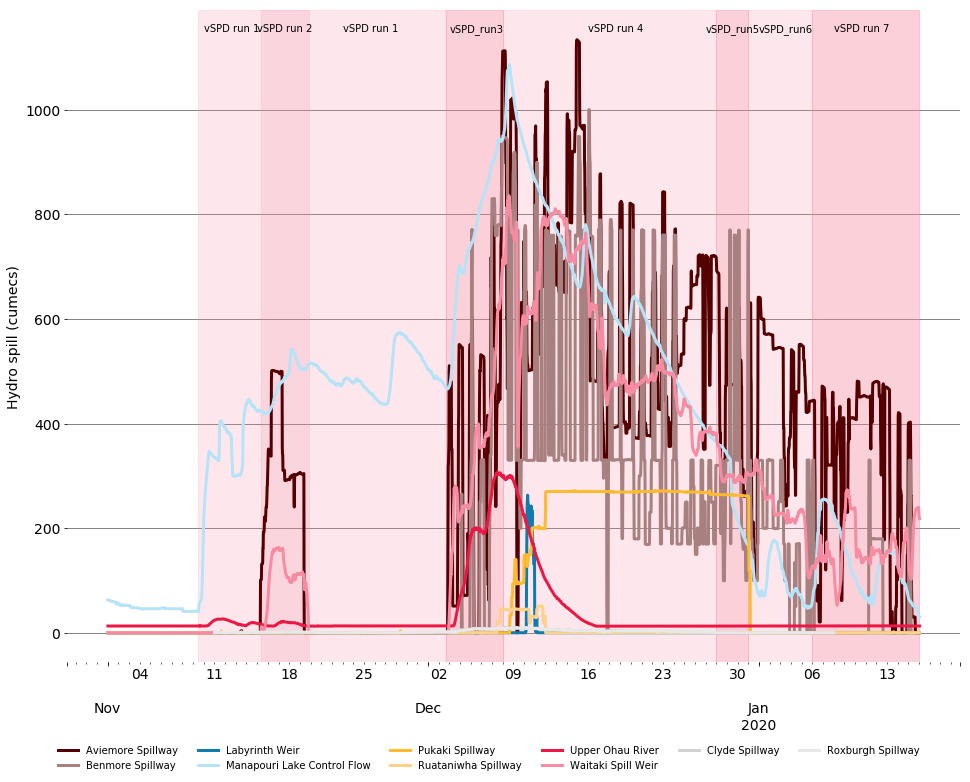

In [4]:
colours()
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)

MERI_spill.sort_index(axis=1).plot(ax=ax, lw=3, fontsize=14)
(CTCT_spill/100).plot(ax=ax, lw=3)
legend_format(ax, cols=6, ypos=-0.18)
plot_formatting(ax)
#UTS_period(ax)
plot_shading(ax, y_offset=1150)
ax.set_xlabel('')
ax.set_ylabel('Hydro spill (cumecs)', fontsize=14)

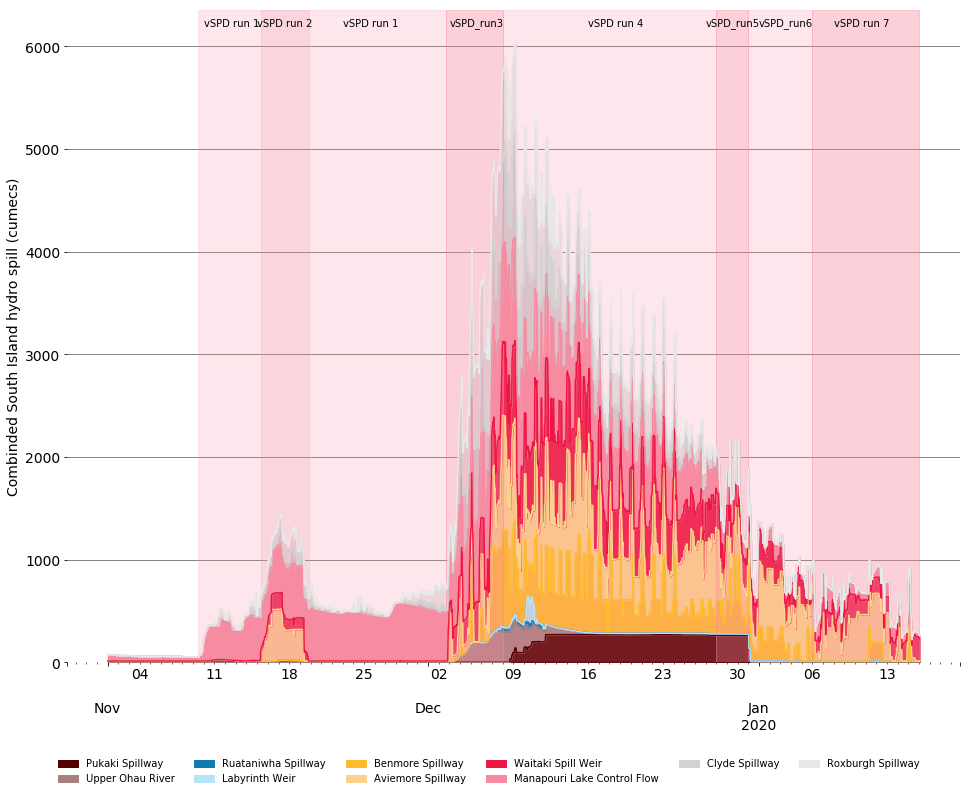

In [5]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)

spill2.sort_index(level=1).plot(kind='area', ax=ax, fontsize=14)
legend_format(ax, cols=5, fontsize=14, xpos=-0.04, ypos=-0.2)
ax.set_ylabel('Combinded South Island hydro spill (cumecs)', fontsize=14)
legend_format(ax, cols=6, ypos=-0.2)
plot_formatting(ax)
#UTS_period(ax)
plot_shading(ax, y_offset=6200)


#### Basecase vSPD runs

For each of these time periods we first performed a basecase vSPD run which outputted results that matched final pricing, i.e., what was settled in the wholesale spot market at the time.  

#### Low offer vSPD runs
We then altered SI hydro generation offer prices at the generators that were spilling.  We did this for several lower offer prices to investigate the effects, if particular we looked at changing offer prices to spilling generators with the following offers:

  - \$0/MWh
  - \$0.01/MWh (results illustrated below)
  - \$6.35/MWh (results illustrated below)
  - \$10/MWh (results illustrated below)
  - \$20/MWh (results illustrated below)
  - \$30/MWh (results illustrated below)

#### Notes on Transmission constraints

When lowering offer prices, and potentially increasing generation output we were careful to ensure that transmission constraints were included in the vSPD formulation.  This is required because a change in generation offer behaviour will result in increased LSI generation and the potential for transmission constraints out of the Lower South Island to bind.  These constraints were not necessary in the base case Final Pricing cases.  

The System Operator, in the pricing schedules and in final pricing, uses a tool called the Simultaneous    Feasibility Test (SFT).  This test is an AC power flow model of the current network configuration that automatically builds transmission constraints on-the-fly to ensure the transmission network can operate if a single element, like a single circuit or transformer, trips (called N-1).  As we do not have this tool we relied on both historically built constraints, as well as contracting System Operator engineers to check and manually model these transmission constraints.  A complicating factor during the flood event was the damage, and consequent loss of a section of transmission line on the Rangitata River that feeds Christchurch and the Upper South Island (USI).  This occurred in the evening of 7 December 2019.

Two LSI transmission constraints were required to be manually added to the vSPD runs to ensure the  transmission system operated within its means.  These were:

   - between Aviemore and Benmore on the Waitaki river, this constraint in particular is import to model following the damage and long term outage that has occurred on the Livingston - Islington transmission line[<sup>1</sup>](#fn1).
   - over-loading on the Roxburgh - Naseby transmission line following a trip on either of the Clyde - Roxburgh transmission circuits[<sup>2</sup>](#fn2). 

<span id="fn1"> [1] **AVI_BEN constraint (in vSPDsolve.gms)**

<sub> The AVI_BEN transmission constraints added to vSPDsolve.gms were:</sub>
    
<sub>i_tradePeriodBranchConstraintFactors(i_TradePeriod,'AVI_BEN1.1__AVI_BEN2.1__AVI_BEN2__AVI__LN','AVI_BEN1.1') = 1.216 ; i_tradePeriodBranchConstraintFactors(i_TradePeriod,'AVI_BEN1.1__AVI_BEN2.1__AVI_BEN2__AVI__LN','AVI_BEN2.1') = 0.921 ; i_tradePeriodBranchConstraintRHS(i_TradePeriod,'AVI_BEN1.1__AVI_BEN2.1__AVI_BEN2__AVI__LN','i_constraintLimit') = 250 ; i_tradePeriodBranchConstraintRHS(i_TradePeriod,'AVI_BEN1.1__AVI_BEN2.1__AVI_BEN2__AVI__LN','i_constraintSense') = -1 ;
    </sub>
    
<span id="fn2"> [2]**NSY_ROX constraint (in vSPDsolve.gms)**
    
<sub>This constraint is managed with a Special Protection Scheme (SPS) which, following a detection of an over-load on the Roxburgh - Naseby circuit, splits the Roxburgh 220kV bus.  Following this split, the effective impedance of the Roxburgh - Naseby circuit is increased which reduces the power flow and relieves the constraint.  One issue with this scheme during high LSI hydro generation is that it could inadvertently trigger by steady states flows if flows reach close to the steady states transmission limit on the Roxburgh - Naseby circuit.  To ensure that this does not occur the System Operator added manual constraint equations in the vSPD model to ensure that this transmission line did not inadvertently trip in steady state.  Although this sounds like a large change, it is not and this constraint should have always existed as part of the SPS scheme.  Possibly the trigger level for the operation of the scheme (the line flow on the Roxburgh - Naseby circuit) should have been increased to temporary 15 minute off-load limits which would allow slightly more transmission out of the LSI region.  The NSY_ROX transmission  constraints added to vSPDsolve.gms were:
    </sub>
   
<sub>i_tradePeriodBranchConstraintFactors(i_TradePeriod,'NSY_ROX.1__CYD_TWZ1.1__:S__CYD_TWZ1__ROX__LN','NSY_ROX.1') = -1 ; i_tradePeriodBranchConstraintFactors(i_TradePeriod,'NSY_ROX.1__CYD_TWZ1.1__:S__CYD_TWZ1__ROX__LN','CYD_TWZ1.1') = -0.084 ; i_tradePeriodBranchConstraintFactors(i_TradePeriod,'NSY_ROX.1__CYD_TWZ2.1__:S__CYD_TWZ2__ROX__LN','NSY_ROX.1') = -1 ; i_tradePeriodBranchConstraintFactors(i_TradePeriod,'NSY_ROX.1__CYD_TWZ2.1__:S__CYD_TWZ2__ROX__LN','CYD_TWZ2.1') = -0.084 ;
    </sub>

<sub>i_tradePeriodBranchConstraintRHS(i_TradePeriod,'NSY_ROX.1__CYD_TWZ1.1__:S__CYD_TWZ1__ROX__LN','i_constraintLimit') = 220 ; i_tradePeriodBranchConstraintRHS(i_TradePeriod,'NSY_ROX.1__CYD_TWZ1.1__:S__CYD_TWZ1__ROX__LN','i_constraintSense') = -1 ; i_tradePeriodBranchConstraintRHS(i_TradePeriod,'NSY_ROX.1__CYD_TWZ2.1__:S__CYD_TWZ2__ROX__LN','i_constraintLimit') = 220 ; i_tradePeriodBranchConstraintRHS(i_TradePeriod,'NSY_ROX.1__CYD_TWZ2.1__:S__CYD_TWZ2__ROX__LN','i_constraintSense') = -1 ;
    </sub>
    
</span>


In [6]:
# Load vSPD results using parquet files = this is FAST!
path = "vSPD_data/"

bc = vSPD_loader(path, basecase, csv=False)
bc2 = vSPD_loader(path, basecase2, csv=False)
bc3 = vSPD_loader(path, basecase3, csv=False)

# Load $0.01/MWh vSPD run
run1_001MWh = vSPD_loader(path, vSPDrun1_001MWh, csv=False)
run2_001MWh = vSPD_loader(path, vSPDrun2_001MWh, csv=False)
run3_001MWh = vSPD_loader(path, vSPDrun3_001MWh, csv=False)
run4_001MWh = vSPD_loader(path, vSPDrun4_001MWh, csv=False)
run5_001MWh = vSPD_loader(path, vSPDrun5_001MWh, csv=False)
run6_001MWh = vSPD_loader(path, vSPDrun6_001MWh, csv=False)
run7_001MWh = vSPD_loader(path, vSPDrun7_001MWh, csv=False)

# Load $6pt35/MWh vSPD run
run1_6pt35 = vSPD_loader(path, vSPDrun1_6pt35, csv=False)
run2_6pt35 = vSPD_loader(path, vSPDrun2_6pt35, csv=False)
run3_6pt35 = vSPD_loader(path, vSPDrun3_6pt35, csv=False)
run4_6pt35 = vSPD_loader(path, vSPDrun4_6pt35, csv=False)
run5_6pt35 = vSPD_loader(path, vSPDrun5_6pt35, csv=False)
run6_6pt35 = vSPD_loader(path, vSPDrun6_6pt35, csv=False)
run7_6pt35 = vSPD_loader(path, vSPDrun7_6pt35, csv=False)

# Load $10/MWh vSPD run
run1_10MWh = vSPD_loader(path, vSPDrun1_10MWh, csv=False)
run2_10MWh = vSPD_loader(path, vSPDrun2_10MWh, csv=False)
run3_10MWh = vSPD_loader(path, vSPDrun3_10MWh, csv=False)
run4_10MWh = vSPD_loader(path, vSPDrun4_10MWh, csv=False)
run5_10MWh = vSPD_loader(path, vSPDrun5_10MWh, csv=False)
run6_10MWh = vSPD_loader(path, vSPDrun6_10MWh, csv=False)
run7_10MWh = vSPD_loader(path, vSPDrun7_10MWh, csv=False)

# Load $20/MWh vSPD run
run1_20MWh = vSPD_loader(path, vSPDrun1_20MWh, csv=False)
run2_20MWh = vSPD_loader(path, vSPDrun2_20MWh, csv=False)
run3_20MWh = vSPD_loader(path, vSPDrun3_20MWh, csv=False)
run4_20MWh = vSPD_loader(path, vSPDrun4_20MWh, csv=False)
run5_20MWh = vSPD_loader(path, vSPDrun5_20MWh, csv=False)
run6_20MWh = vSPD_loader(path, vSPDrun6_20MWh, csv=False)
run7_20MWh = vSPD_loader(path, vSPDrun7_20MWh, csv=False)

# Load $30/MWh vSPD run
run1_30MWh = vSPD_loader(path, vSPDrun1_30MWh, csv=False)
run2_30MWh = vSPD_loader(path, vSPDrun2_30MWh, csv=False)
run3_30MWh = vSPD_loader(path, vSPDrun3_30MWh, csv=False)
run4_30MWh = vSPD_loader(path, vSPDrun4_30MWh, csv=False)
run5_30MWh = vSPD_loader(path, vSPDrun5_30MWh, csv=False)
run6_30MWh = vSPD_loader(path, vSPDrun6_30MWh, csv=False)
run7_30MWh = vSPD_loader(path, vSPDrun7_30MWh, csv=False)


Loading: vSPD_data/LSI_Flood_Basecase_SystemResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BranchResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_TraderResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_SummaryResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BusResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BidResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_ScarcityResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_OfferResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_MNodeConstraintResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_NodeResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BrConstraintResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_ReserveResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_SystemResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_BranchResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_TraderResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_SummaryResu

In [7]:
# Piece together the three base caser runs - do this separately (three runs as UTS analysis was on-going at the time).
BC={}
for k in files.keys():
    print(k)
    BC[k] = bc[k].append(bc2[k]).append(bc3[k])

sys_res
brh_res
trd_res
sum_res
bus_res
bid_res
scr_res
gen_res
MNC_res
nod_res
brC_res
res_res


In [8]:
# Piece together the 7 time periods for each of the different simulations
ALL_RUNS_001MWh = piece_together_vSPD_runs(run1_001MWh, run2_001MWh, run3_001MWh, run4_001MWh,
                                          run5_001MWh, run6_001MWh, run7_001MWh, files)
ALL_RUNS_6pt35 = piece_together_vSPD_runs(run1_6pt35, run2_6pt35, run3_6pt35, run4_6pt35,
                                          run5_6pt35, run6_6pt35, run7_6pt35, files)
ALL_RUNS_10MWh = piece_together_vSPD_runs(run1_10MWh, run2_10MWh, run3_10MWh, run4_10MWh,
                                          run5_10MWh, run6_10MWh, run7_10MWh, files)
ALL_RUNS_20MWh = piece_together_vSPD_runs(run1_20MWh, run2_20MWh, run3_20MWh, run4_20MWh,
                                          run5_20MWh, run6_20MWh, run7_20MWh, files)
ALL_RUNS_30MWh = piece_together_vSPD_runs(run1_30MWh, run2_30MWh, run3_30MWh, run4_30MWh,
                                          run5_30MWh, run6_30MWh, run7_30MWh, files)


# Initial vSPD results
### Estimating additional hydro spill - ignoring physical hydrological constraints

The best method of comparing the difference between the different vSPD runs is to look at the change in dispatched generation.  We can do this easily by plotting the change in HVDC flow between the basecase vSPD run and the low offer LSI generation runs.  



In [9]:
# Return HVDC flow for different vSPD simulations
HVDC_BC = get_hvdc_flow(BC)["2019/12"]
HVDC_001MWh = get_hvdc_flow(ALL_RUNS_001MWh)["2019/12"]  
HVDC_6pt35 = get_hvdc_flow(ALL_RUNS_6pt35)["2019/12"]
HVDC_10MWh = get_hvdc_flow(ALL_RUNS_10MWh)["2019/12"]
HVDC_20MWh = get_hvdc_flow(ALL_RUNS_20MWh)["2019/12"]
HVDC_30MWh = get_hvdc_flow(ALL_RUNS_30MWh)["2019/12"]


In [10]:

HVDC = pd.DataFrame({'Basecase (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_BC.mean(), HVDC_BC.sum()/2000.0): HVDC_BC,
                     'LSI offers@$0.01/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_001MWh.mean(), HVDC_001MWh.sum()/2000.0): HVDC_001MWh,
                     'LSI offers@$6.35/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_6pt35.mean(), HVDC_6pt35.sum()/2000.0): HVDC_6pt35,
                     'LSI offers@$10/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_10MWh.mean(), HVDC_10MWh.sum()/2000.0): HVDC_10MWh,
                     'LSI offers@$20/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_20MWh.mean(), HVDC_20MWh.sum()/2000.0): HVDC_20MWh,
                     'LSI offers@$30/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_30MWh.mean(), HVDC_30MWh.sum()/2000.0): HVDC_30MWh})

Text(0.5, 1.0, 'HVDC flows for Basecase and vSPD runs (December 2019)')

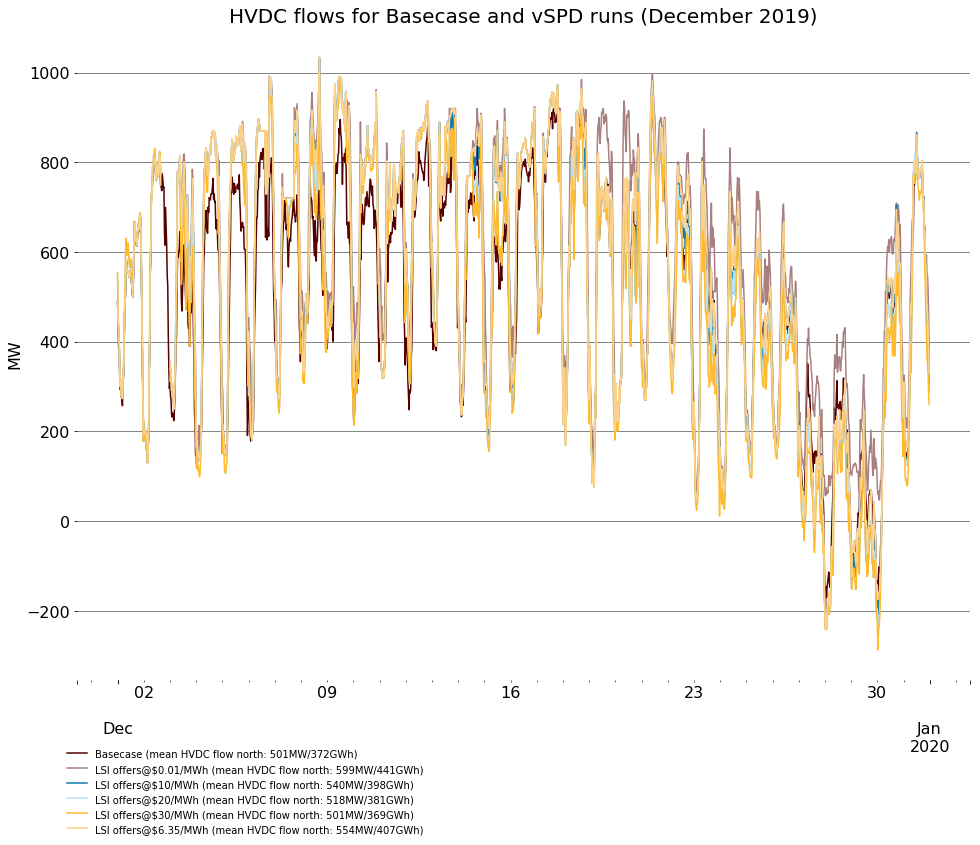

In [11]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
HVDC.plot(ax=ax, fontsize=16)
plot_formatting(ax)
legend_format(ax, cols=1, ypos=-0.25)
ax.set_xlabel('')
ax.set_ylabel('MW', fontsize=16)
ax.set_title('HVDC flows for Basecase and vSPD runs (December 2019)', fontsize=20)


On first appearance the difference is relatively small.  There are various reasons for this but we think one of the main reasons is low offer prices in the North Island.  For example an offer at a North Island generation, say at \$0.01/MWh is likely to be dispatched ahead of the same offer in the South Island.  This is due to the nature of the wholesale spot market in New Zealand which takes into account electrical losses.  This means generation closer to load is favoured ahead of generation further away from load.

However the difference in HVDC flow add over time, as illustrated below.

Text(2020-01-01 12:00:00, 1.3113223100000482, '1.7MW/1.3GWh')

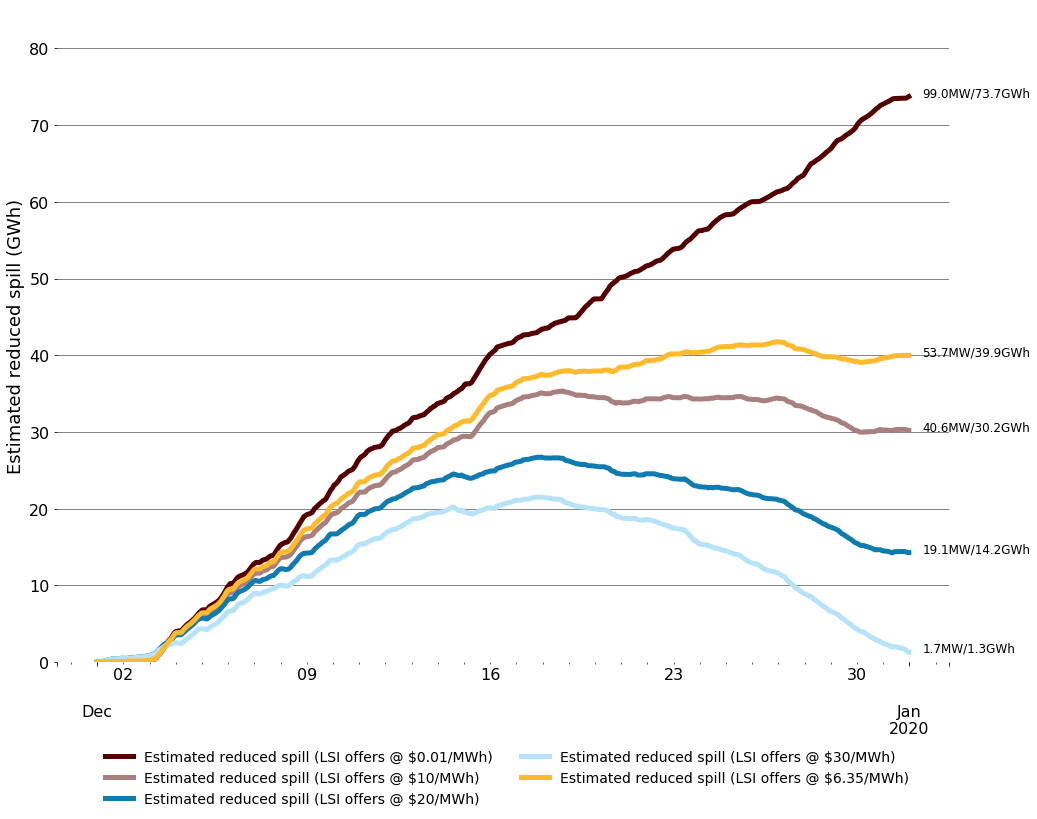

In [12]:

HVDC_diff_001MWh = (HVDC_001MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_6pt35 = (HVDC_6pt35-HVDC_BC).fillna(method='ffill')
HVDC_diff_10MWh = (HVDC_10MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_20MWh = (HVDC_20MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_30MWh = (HVDC_30MWh-HVDC_BC).fillna(method='ffill')

HVDC_diff_001MWh_cs = HVDC_diff_001MWh.cumsum()/2e3
HVDC_diff_6pt35_cs = HVDC_diff_6pt35.cumsum()/2e3
HVDC_diff_10MWh_cs = HVDC_diff_10MWh.cumsum()/2e3
HVDC_diff_20MWh_cs = HVDC_diff_20MWh.cumsum()/2e3
HVDC_diff_30MWh_cs = HVDC_diff_30MWh.cumsum()/2e3

df = pd.DataFrame({'Estimated reduced spill (LSI offers @ $0.01/MWh)': HVDC_diff_001MWh_cs,
                   'Estimated reduced spill (LSI offers @ $6.35/MWh)': HVDC_diff_6pt35_cs,
                   'Estimated reduced spill (LSI offers @ $10/MWh)': HVDC_diff_10MWh_cs,
                   'Estimated reduced spill (LSI offers @ $20/MWh)': HVDC_diff_20MWh_cs,
                   'Estimated reduced spill (LSI offers @ $30/MWh)': HVDC_diff_30MWh_cs})

fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
df["2019/12"].plot(lw=5, ax=ax, fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Estimated reduced spill (GWh)', fontsize=18)
ax.set_ylim([0, 85])
plot_formatting(ax)
legend_format(ax, fontsize=14, xpos=0.04, ypos=-.24, cols=2)
ax.text(datetime(2020,1,1,12), HVDC_diff_001MWh_cs[-1], str(int(10*HVDC_diff_001MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_001MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_6pt35_cs[-1], str(int(10*HVDC_diff_6pt35_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_6pt35_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_10MWh_cs[-1], str(int(10*HVDC_diff_10MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_10MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_20MWh_cs[-1], str(int(10*HVDC_diff_20MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_20MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_30MWh_cs[-1], str(int(10*HVDC_diff_30MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_30MWh_cs[-1])/10) + 'GWh', fontsize=12)



In [13]:
# calculate average additional spill for December 2019 in ave. MW. 
(1000*df["2019/12"].tail(1).T["2019/12/31 23:30"]/(24*31)).sort_values()


Estimated reduced spill (LSI offers @ $30/MWh)       1.762530
Estimated reduced spill (LSI offers @ $20/MWh)      19.191367
Estimated reduced spill (LSI offers @ $10/MWh)      40.604725
Estimated reduced spill (LSI offers @ $6.35/MWh)    53.758931
Estimated reduced spill (LSI offers @ $0.01/MWh)    99.070730
Name: 2019-12-31 23:30:00, dtype: float64

In [14]:
# return difference in total system costs
sc_001 = calc_diff_sys_cost(BC, ALL_RUNS_001MWh)/1e6
sc_635 = calc_diff_sys_cost(BC, ALL_RUNS_6pt35)/1e6
sc_10 = calc_diff_sys_cost(BC, ALL_RUNS_10MWh)/1e6
sc_20 = calc_diff_sys_cost(BC, ALL_RUNS_20MWh)/1e6
sc_30 = calc_diff_sys_cost(BC, ALL_RUNS_30MWh)/1e6

sys_cost = pd.DataFrame({'$0.01/MWh': sc_001,
                         '$6.35/MWh': sc_635,
                        '$10/MWh': sc_10,
                        '$20/MWh': sc_20,
                        '$30/MWh': sc_30})


Text(0, 0.5, '$m')

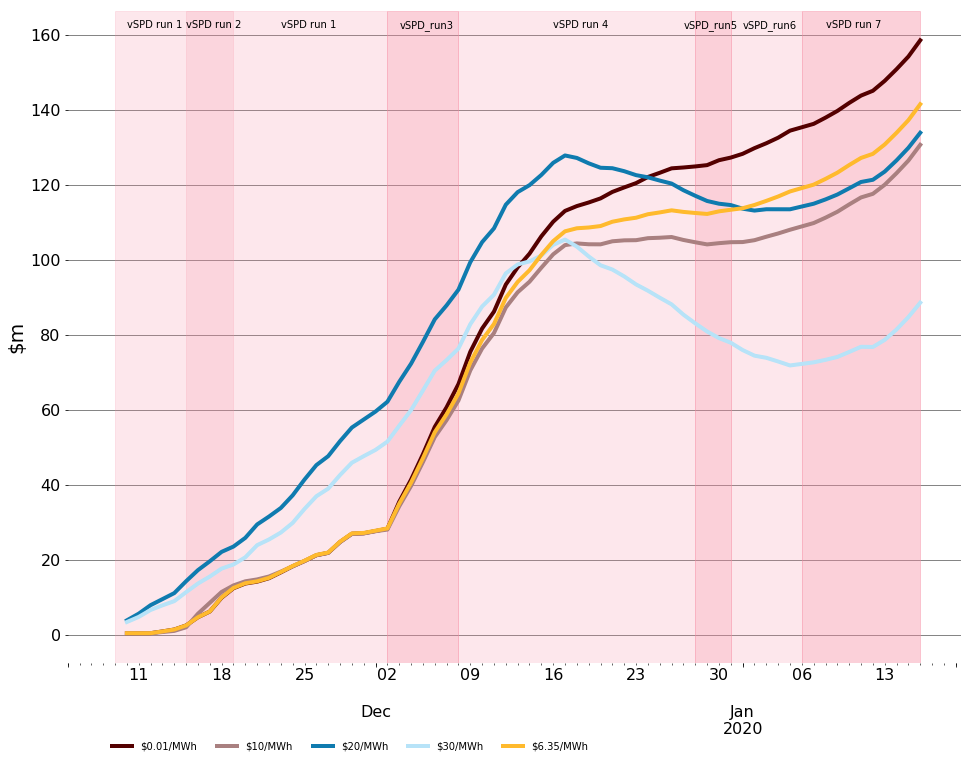

In [15]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
sys_cost.cumsum().interpolate().plot(ax=ax, lw=4, fontsize=16)
plot_shading(ax, y_offset=162)
plot_formatting(ax)
legend_format(ax, xpos=0.04, cols=5)
ax.set_xlabel('')
ax.set_ylabel('$m', fontsize=20)

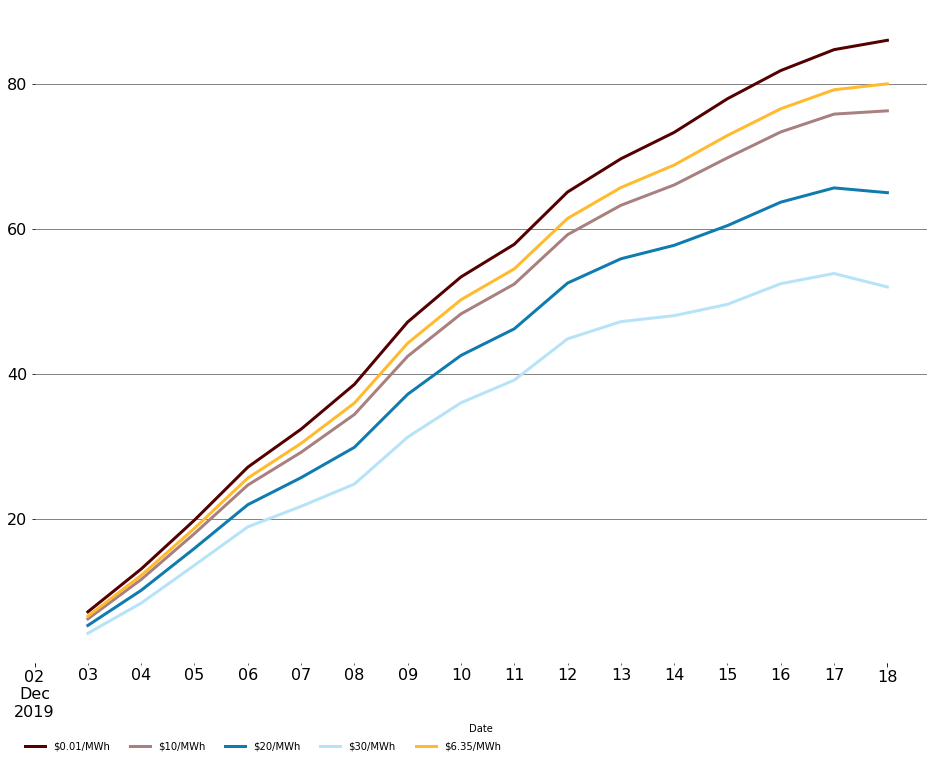

In [177]:
# UTS period (this is the period agreed by the EA board)
UTS_start = "2019/12/3"
UTS_end = "2019/12/18"
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
sys_cost[UTS_start: UTS_end].cumsum().plot(ax=ax, lw=3, fontsize=16)
plot_formatting(ax)
legend_format(ax, cols=5)

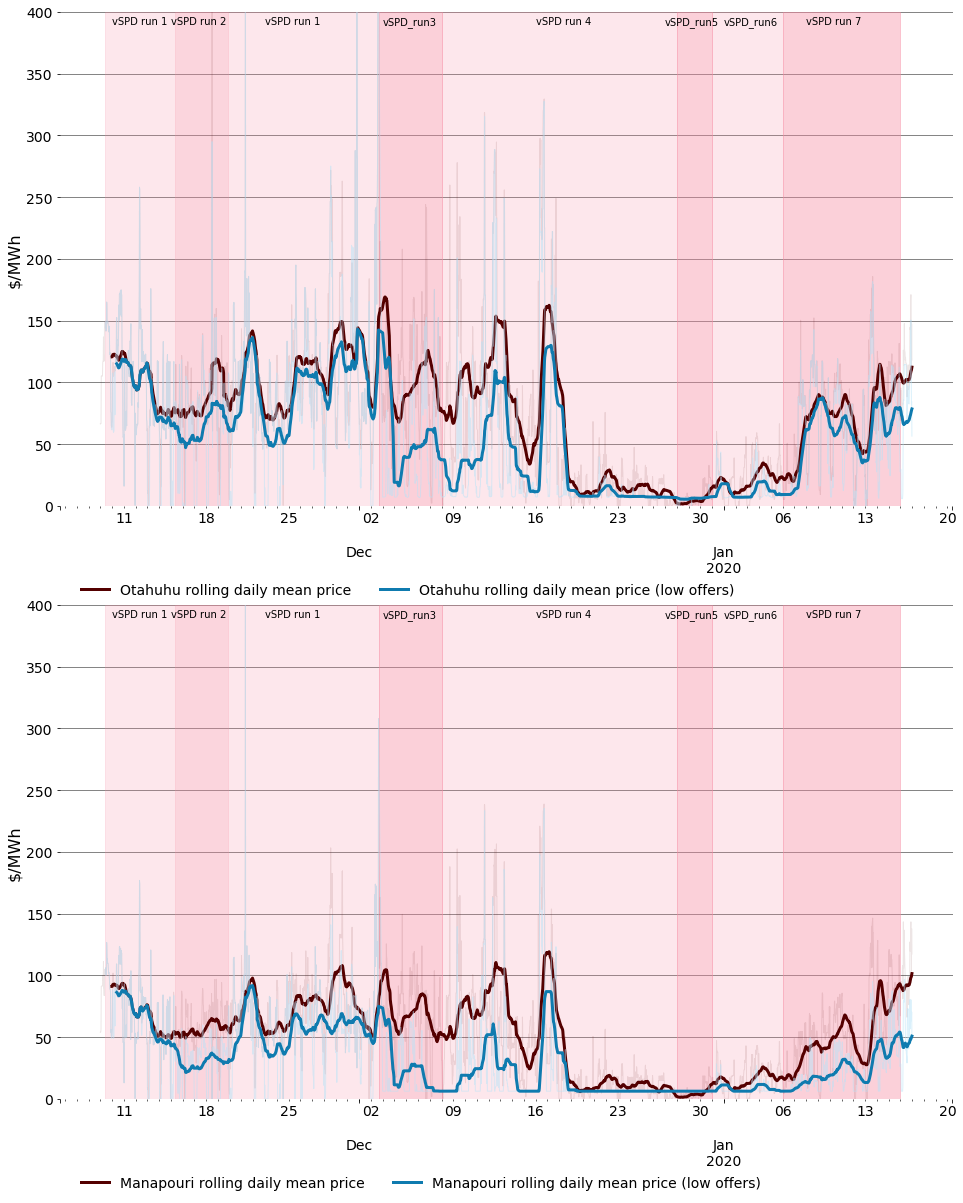

In [17]:
fig = plt.figure(1, figsize=[16,20])
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#MAN
BC['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].plot(ax=ax2, lw=1, alpha=0.1, fontsize=14, color=c_p['br1'], label='')
BC['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].rolling(48).mean().plot(ax=ax2, lw=3, fontsize=14, label='Manapouri rolling daily mean price')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].plot(ax=ax2, lw=1, alpha=0.5, fontsize=14, color=c_p['bl2'], label='')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].rolling(48).mean().plot(ax=ax2, lw=3, fontsize=14, color=c_p['bl1'], label='Manapouri rolling daily mean price (low offers)' )
#OTA
BC['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].plot(ax=ax, lw=1, alpha=0.1, fontsize=14, color=c_p['br1'], label='')
BC['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].rolling(48).mean().plot(ax=ax, lw=3, fontsize=14, label='Otahuhu rolling daily mean price')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].plot(ax=ax, lw=1, alpha=0.5, fontsize=14, color=c_p['bl2'], label='')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].rolling(48).mean().plot(ax=ax, lw=3, fontsize=14, color=c_p['bl1'], label='Otahuhu rolling daily mean price (low offers)' )

ax.set_ylabel('$/MWh', fontsize=16)
ax.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('$/MWh', fontsize=16)

ax.set_ylim([0, 400])
ax2.set_ylim([0, 400])
plot_formatting(ax)
plot_formatting(ax2)
plot_shading(ax, y_offset=390)
plot_shading(ax2, y_offset=390)
legend_format(ax, cols=2, ypos=-0.21, xpos=0.01, fontsize=14)
legend_format(ax2, cols=2, ypos=-0.21, xpos=0.01, fontsize=14)



### Estimating additional hydro spill - including physical hydrological constraints

One problem with the vSPD simulations above is the lack of modelling of physical constraints outside of the vSPD market model.  In this instance these constraints are environmental and hydrological in nature and are not part of the vSPD or SPD formulation.   For example, a lot of the spill at Manapouri is due to the environmental resource consent conditions as detailed in our main report.  A second issue we discovered after discussions with Meridian is the 'no-go' zone on the Benmore spillway.  

The details of the specific steps we undertook to estimate the excess spill, in particular related to the Benmore spillway issue, are as follows:

    a) All South Island generators except Benmore were modelled to generate the same as they did during the flood event – we use reconciliation (RM) data for this.
    
    b) Using vSPD we determined total South Island generation dispatched had all offers for spilling hydro stations been set to $0.01/MWh. This ensures all market constraints, including additional HVDC flow are satisfied, but ignores any spillway constraints at Benmore.
    
    c) The actual generation (RM data excluding Benmore) was subtracted from the total dispatch that the $0.01/MWh offer vSPD simulation predicts. This gave us a total potential Benmore generation series which is truncated at Benmore’s generation capacity. This is the new potential Benmore generation ignoring the spillway constraint.
    
    d) The Benmore RM data (what was actually generated) was then subtracted from this new potential Benmore generation to get the additional potential Benmore generation.
    
    e) This was then converted to cumecs and subtracted from the spill data which is also in cumecs. 
    
    f) If this resulted in spill within the no-go zone then the generation at Benmore in the trading period was discarded. 
    
    g) For those trading periods that result in an increase in generation, this generation was converted to MW, summed, and converted to GWh.  

The calculations for this analysis are below.  We first take a look at the Benmore spill and Benmore generation hydro flows.  Given the spillway constraints, we determine trading periods where, ignoring all other market constraints, we think Benmore could have physically generated more, for the same generator station through flow, satisfying the spillway constraints.   



In [107]:
# Get RM generation data during December for LSI generators

RMG_LSI = pd.read_parquet("data/201912_RMG_LSI.parquet")
RMG_BEN = RMG_LSI["BEN2202"]
RMG_MERI = RMG_LSI.loc[:, ['OHA2201', 'OHB2201', 'OHC2201', 'BEN2202', 'AVI2201', 'WTK0111', 'MAN2201']]
RMG_MERI_WTK = RMG_MERI.loc[:, ['OHA2201', 'OHB2201', 'OHC2201', 'BEN2202', 'AVI2201', 'WTK0111']]

# Benmore spill data
BEN_SPILL = MERI_spill['Benmore Spillway']["2019/12"]
BEN_SPILL.index = BEN_SPILL.index.map(lambda x: x+timedelta(seconds=15*60))
MAX_BEN_GEN_FLOW = 650
BEN_g_CUMECS = RMG_BEN*(MAX_BEN_GEN_FLOW/RMG_BEN.max())
CUMECS_to_MW = RMG_BEN.max()/MAX_BEN_GEN_FLOW
CUMECS_to_MW = 1/1.223  # https://www.emi.ea.govt.nz/Environment/Datasets/HydrologicalModellingDataset/1_InfrastructureAndHydroConstraintAttributes/20180726_InfrastructureAndHydroConstraintAttributes.csv

BEN_CUMECS = pd.DataFrame({'Spillway': BEN_SPILL,
                           'Generation': BEN_g_CUMECS, 
                           'Total': BEN_SPILL + BEN_g_CUMECS})

Text(0, 0.5, 'MW')

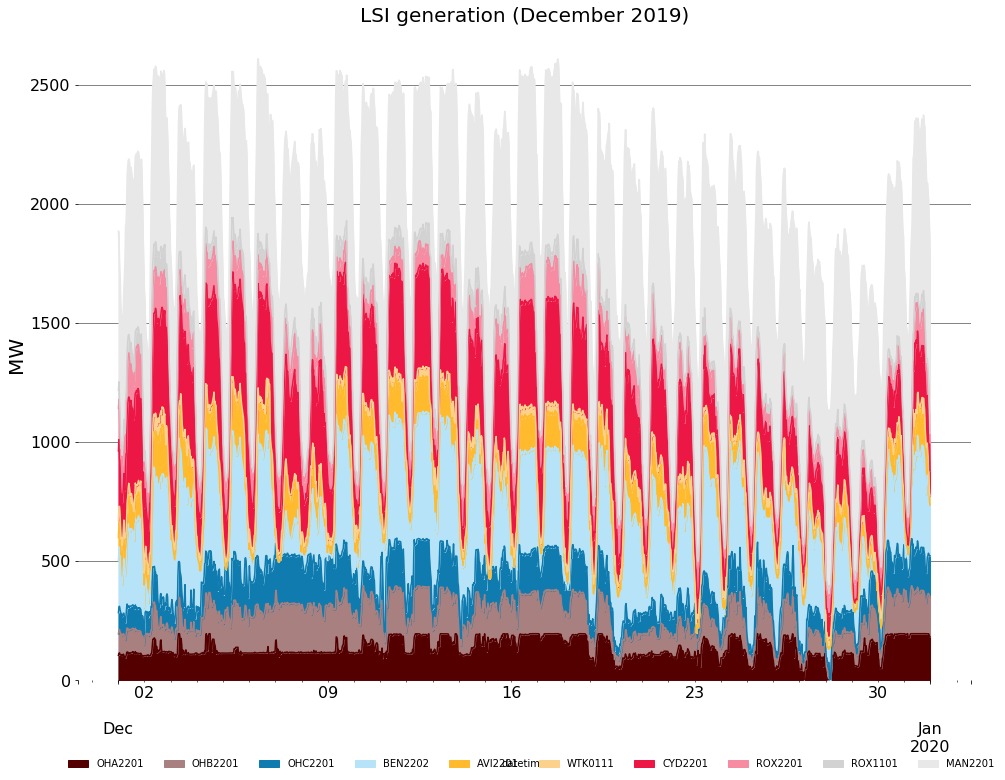

In [109]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
RMG_LSI.plot(kind='area', ax=ax, fontsize=16)
plot_formatting(ax)
legend_format(ax, cols=10)
ax.set_title('LSI generation (December 2019)', fontsize=20)
ax.set_ylabel('MW', fontsize=20)

Text(0.5, 1.0, 'Benmore Hydraulics')

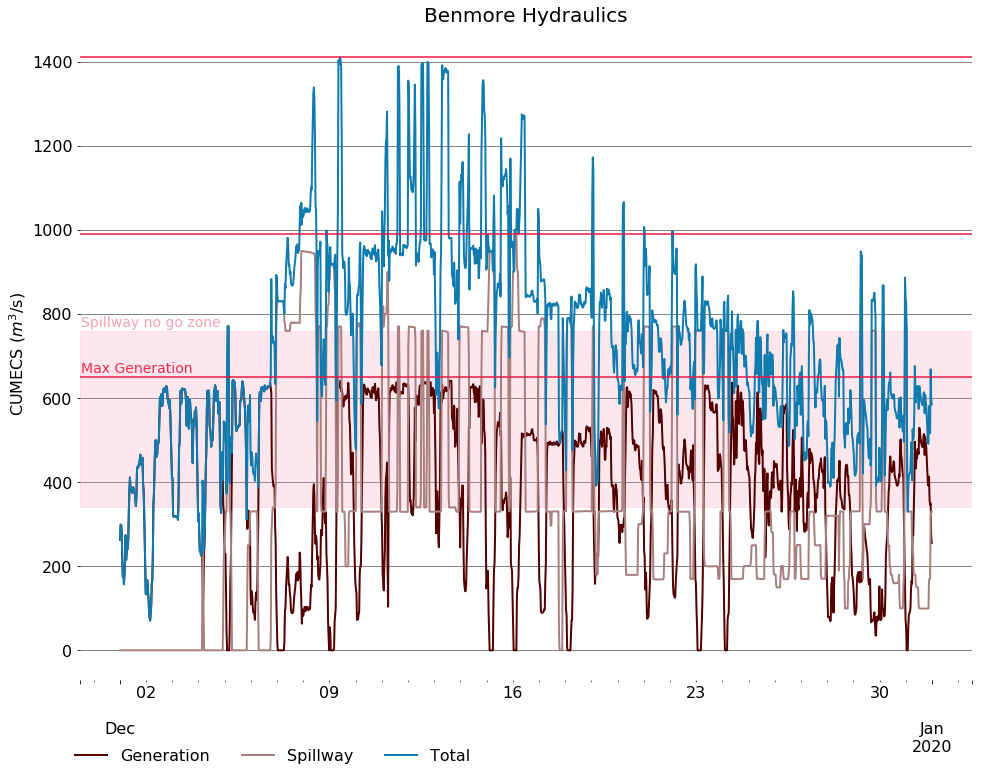

In [110]:

fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
BEN_CUMECS.plot(ax=ax, fontsize=16, lw=2)

ax.axhspan(340, 760, color = c_p['rd2'], alpha=0.2)
ax.axhline(MAX_BEN_GEN_FLOW, color=c_p['rd1'])
ax.axhline(MAX_BEN_GEN_FLOW+340, color=c_p['rd1'])
ax.axhline(MAX_BEN_GEN_FLOW+760, color=c_p['rd1'])


ax.set_ylabel('CUMECS ($m^3$/s)', fontsize=16)
ax.set_xlabel('', fontsize=16)
legend_format(ax, fontsize=16)
plot_formatting(ax)
ax.text(datetime(2019,11,29, 12), 770, 'Spillway no go zone', color=c_p['rd1'],
        fontsize=14, alpha=0.4)
ax.text(datetime(2019,11,29, 12), 660, 'Max Generation', color=c_p['rd1'],
        fontsize=14, alpha=0.9)
ax.set_title('Benmore Hydraulics', fontsize=20)

### Need sort logic to determine periods of interest...

Here, we give Meridian the benefit of the doubt and assume that the total spill that occurred is what is allowed.  This total must be made up from generation and spill that satisfy Benmores spillway constraint, i.e., generation<660cumecs + spill<340 or spill>760

Split into several constraints: 

  - periods when spilling
  - periods when total spill =  <660+340 (1000) = most periods...
  - total when total spill-760 <660 = all periods...

Then during these periods we calculate what could have been generated and the resulting spill that obeys the physical constraints of the Benmore spillway...

I.e.,

  - New Benmore generation = old_generation + spillway (under 660 cumecs).
  - New spill = old total - new generation
  
We discard trading periods that don't match this, although we note that lake Benmore storage could have allowed more flexibility and in reality one could argue that this flexibility in lake level control could have allowed less spill to occur.  In this sense, we think this is a favourable assumption for Meridian.  

In [111]:
# BEN booleans
b1 = BEN_CUMECS.Spillway>0
b2 = BEN_CUMECS.Total<1000
b3 = BEN_CUMECS.Total-760 < 660

boolean = (b1&b2&b3)

In [112]:
100*b1.sum()/b1.count()  # spilling 83.8% of the time during December

83.80376344086021

In [113]:
100*b2.sum()/b1.count()  # total Benmore through flow less than 1000cumecs 89.7% of the time during December

89.78494623655914

In [114]:
100*boolean.sum()/boolean.count()  # % of time when all conditions met

73.58870967741936

In [115]:
BEN_CUMECS_periods = BEN_CUMECS[boolean]
BEN_CUMECS_periods['New Generation']=(BEN_CUMECS_periods.Generation+BEN_CUMECS_periods.Spillway).clip_upper(660)
BEN_CUMECS_periods['New Spill']=BEN_CUMECS_periods['Total'] - BEN_CUMECS_periods['New Generation']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'CUMECS ($m^3$/s)')

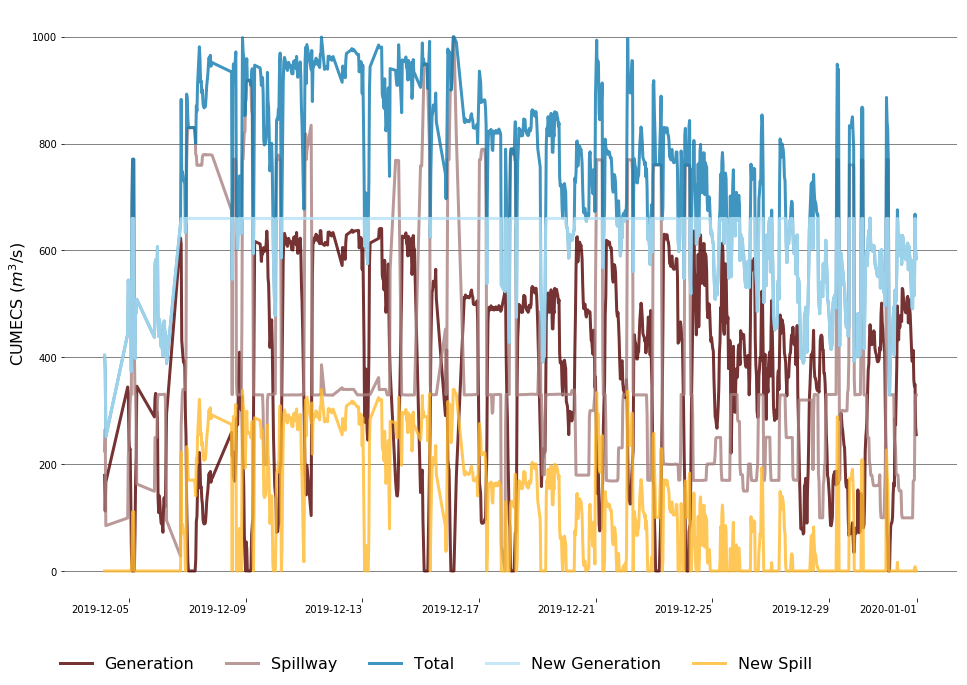

In [116]:

fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
BEN_CUMECS_periods.plot(ax=ax, lw=3, alpha=0.8)
legend_format(ax, fontsize=16, cols=5)
plot_formatting(ax)
ax.set_xlabel('')

ax.set_ylabel('CUMECS ($m^3$/s)', fontsize=16)

In [117]:
# add a few more columns
BEN_CUMECS_periods['Additional generation'] = (BEN_CUMECS_periods['New Generation'] - BEN_CUMECS_periods['Generation'])
BEN_CUMECS_periods = BEN_CUMECS_periods.loc[BEN_CUMECS_periods['Additional generation']>100,:]
BEN_CUMECS_periods = BEN_CUMECS_periods.reindex(BEN_CUMECS.index)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
potential_BEN_generation = pd.DataFrame({'Actual Benmore Generation': BEN_CUMECS_periods['New Generation'],
                                        'Potential Benmore Generation (ignoring market constraints)': BEN_CUMECS['Generation']})

Text(0.5, 0, '')

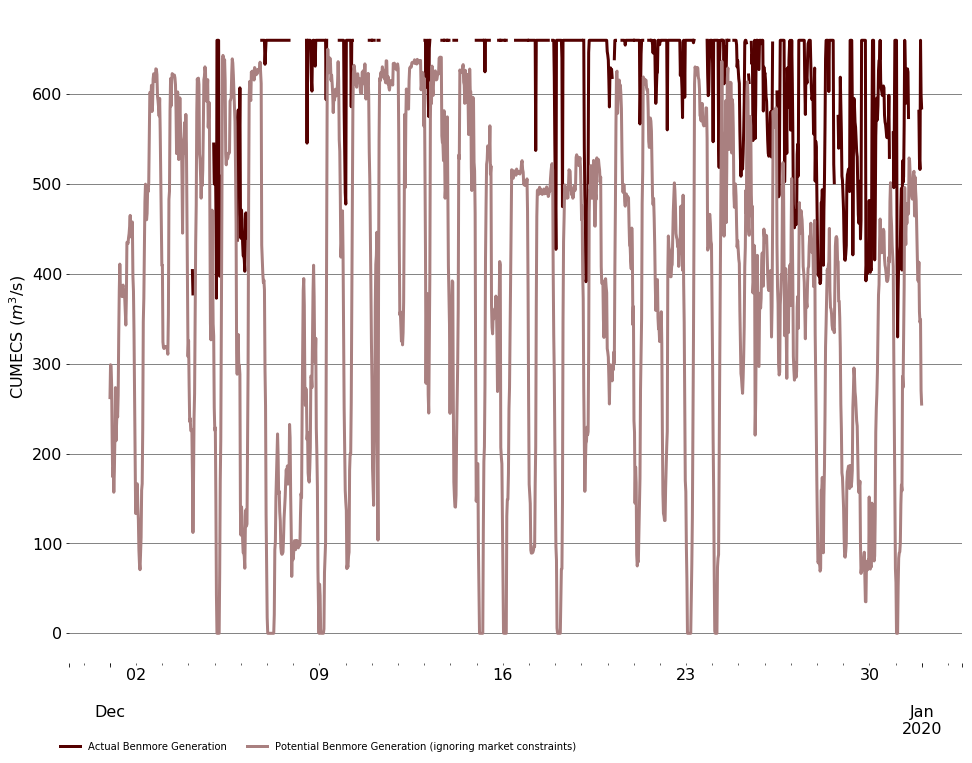

In [119]:

fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
potential_BEN_generation.plot(ax=ax, lw=3, fontsize=16)
plot_formatting(ax)
legend_format(ax)
ax.set_ylabel('CUMECS ($m^3$/s)', fontsize=16)
ax.set_xlabel('')

Text(0, 0.5, 'Cumecs (m$^3$)')

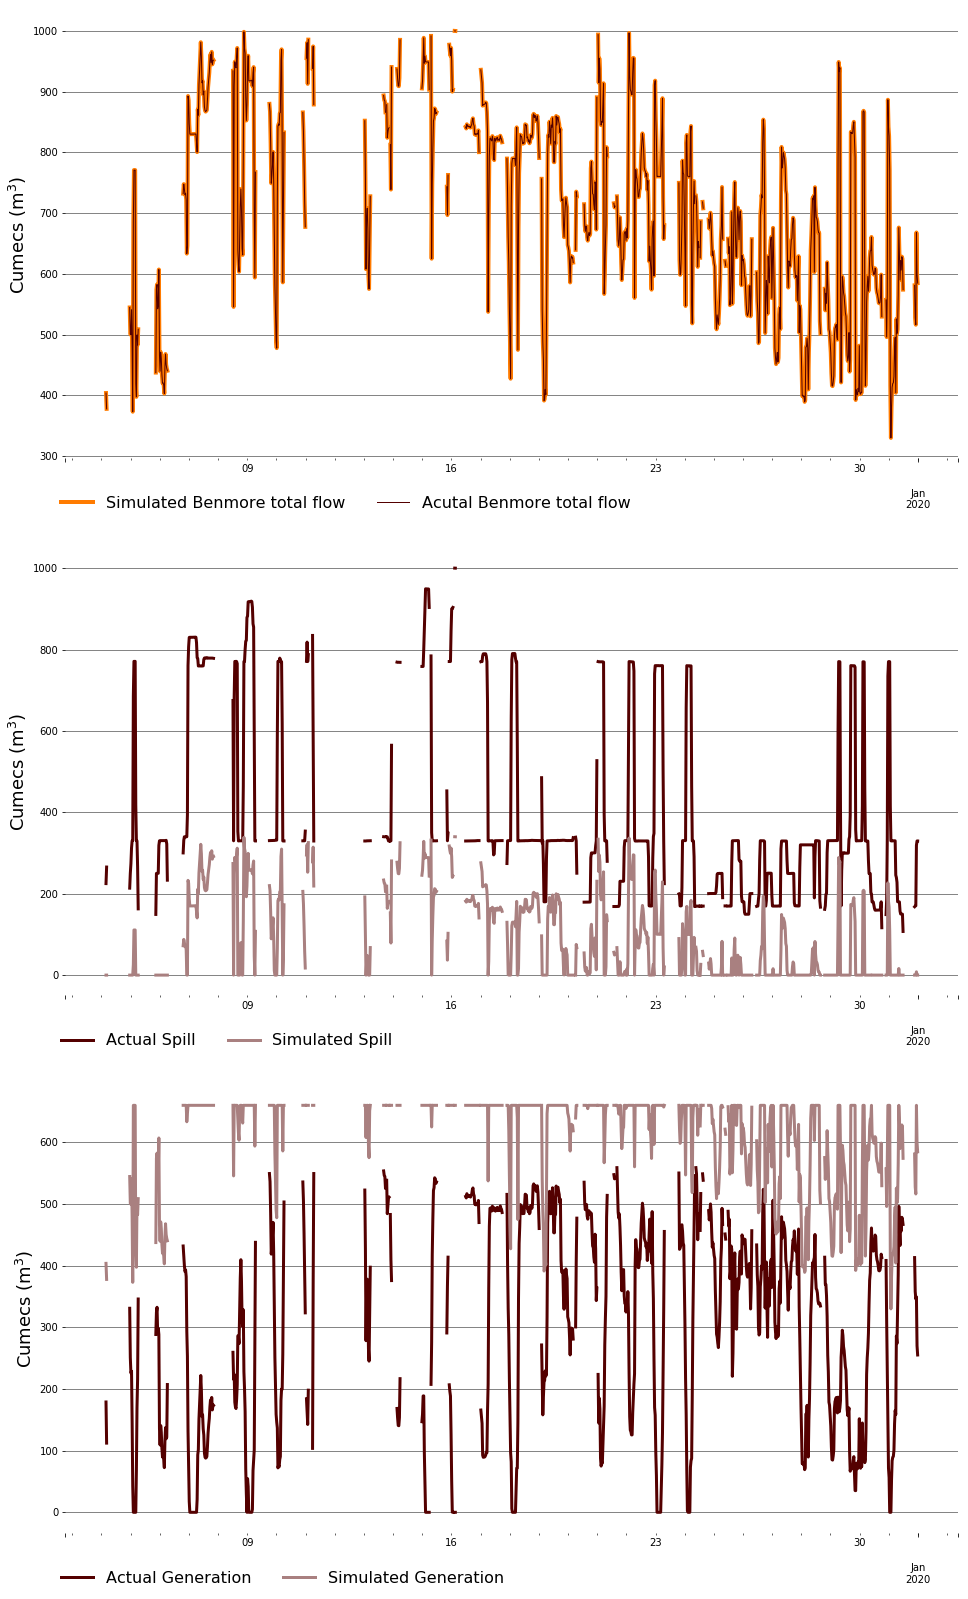

In [120]:

# Logic check - total Benmore flow and before should be equal
fig = plt.figure(1, figsize=[16,28])
ax = fig.add_subplot(311)
new_through_flow_check = BEN_CUMECS_periods['New Spill']+ BEN_CUMECS_periods['New Generation']
old_through_flow_check = BEN_CUMECS_periods['Generation'] + BEN_CUMECS_periods['Spillway']
df1 = pd.DataFrame({'New Benmore total through flow': new_through_flow_check,
                  'Old Benmore total through flow': old_through_flow_check})
df1['New Benmore total through flow'].plot(ax=ax, color=c_s['or1'], lw=4, label='Simulated Benmore total flow')
df1['Old Benmore total through flow'].plot(ax=ax, color=c_p['br1'], lw=1, label='Acutal Benmore total flow')
legend_format(ax, fontsize=16)
plot_formatting(ax)
ax.set_xlabel('')
ax.set_ylabel('Cumecs (m$^3$)', fontsize=18)

ax2 = fig.add_subplot(312)
df2 = pd.DataFrame({'Actual Spill': BEN_CUMECS_periods['Spillway'], 
                   'Simulated Spill': BEN_CUMECS_periods['New Spill']})
df2.plot(ax=ax2, lw=3)

legend_format(ax2, fontsize=16)
plot_formatting(ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Cumecs (m$^3$)', fontsize=18)

ax3 = fig.add_subplot(313)
df3 = pd.DataFrame({'Actual Generation': BEN_CUMECS_periods['Generation'], 
                   'Simulated Generation': BEN_CUMECS_periods['New Generation']})
df3.plot(ax=ax3, lw=3)
legend_format(ax3, fontsize=16)
plot_formatting(ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Cumecs (m$^3$)', fontsize=18)

Text(0.5, 0, '')

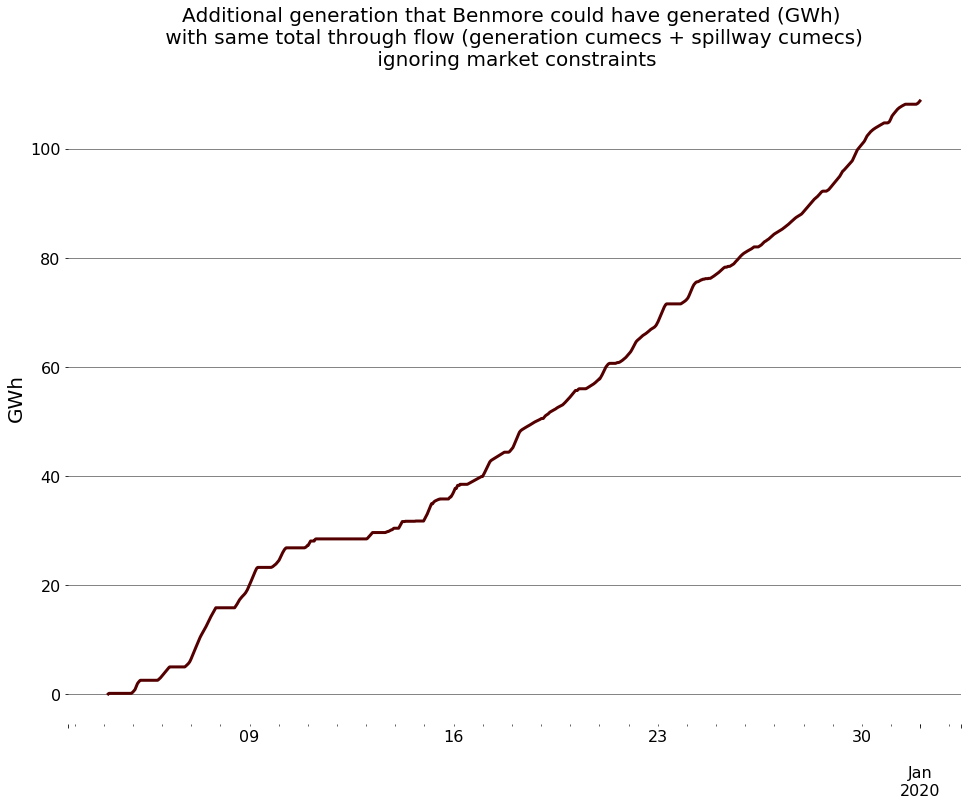

In [121]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
ben_additional = (BEN_CUMECS_periods['Additional generation'].cumsum().fillna(method='ffill'))
ben_add_GWH = ((ben_additional*CUMECS_to_MW)/2000)  #Cumecs to MW to GWh
ben_add_GWH.plot(ax=ax, lw=3, fontsize=16)
ax.set_ylabel('GWh', fontsize=20)
ax.set_title('Additional generation that Benmore could have generated (GWh) \n with same total through flow (generation cumecs + spillway cumecs) \n ignoring market constraints', fontsize=20)
plot_formatting(ax)
ax.set_xlabel('')

We get a pretty consistent total average lost generation MW of about: 

In [122]:
str(int(1000*ben_add_GWH.iloc[-1]/(31*24))) + 'MW'


'146MW'

However, this ignores actual constraints in the Electricity Market.  

In other words, although this may be correct in a physical sense, Benmore would not have been able to achieve this generation output due to other market related constraints including low NI generation offers during evening periods etc. and/or HVDC/transmission constraints.

The next step we look at the LSI offer changes to \\$0.01 /MWh vSPD results.  In these simulations we adjusted all of the LSI generator offers to \\$0.01/MWh and then re-ran the market model.  As Benmore and Pukaki generators are electrically closer to demand, they are favoured over other LSI generation.  


### Some logic

1.  Determine the set of TPs where WTK block generation increases with low offers
2.  Now filter a subset of TPs based on the proxy spill on the HVDC, this ensures we don't identify TPs where spill might have been transfered from the Wataki to other LSI generators because of other market/power system constraints.  Actually the periods should be the same as identified in 1 I think...
3.  The subset of TPs above satisfy market and power system constraints, but not intra-catchment hydrological constraints, the main constraint for the Waitaki Catchment being the "no-go" zone at Lake Benmore.  So for this subset we look at the total Waitaki generation possible if offers had been lower.  To do this, we assume generation at WTK/AVI/OHA/OHB and OHC is the same as what occurred - i.e., we use the RM data for this.  We then subtract this from the total WTK block to get the additional generation required at Benmore.   We will try this at least... 

3. (B) Ok, we will also assume for 3, a case where ALL LSI generation except Benmore remains the same as what occurred, in other words, we assume generation at MAN/ROX/CYD/WTK/AVI/OHA/B/C is the same as what occurred using RM data.  We then substract this from the total LSI dispatched  to get the additional generation required at Benmore.
4.  Once we have calculated the additional generation at Benmore we need to test that this generation is possible given a few physical constraints - e.g., max generation possible as well as ensuring the non-linear spillway constraints are satisfied so as to not operate in  in the no-go zone.  There is a problem doing this as we   
4. To do this, we we first convert the calculated additional generation at Benmore to cumecs then subtract off the total cumec flow through Benmore to get cumec spill through the spillway.  If spillway conditions are satisfied we assume the extra generation was possible, if not we toss this out and assume that extra generation, although possible in the market model, was unlikely due to the intra-catchment hydrological constraints.

In [136]:
#
BEN_CUMEC_new_001MWh, add_spill_001MWh, MW_spill_001MWh = determine_BEN_generation(ALL_RUNS_001MWh, RMG_LSI, BEN_CUMECS, CUMECS_to_MW)
BEN_CUMEC_new_6pt35, add_spill_6pt35, MW_spill_6pt35 = determine_BEN_generation(ALL_RUNS_6pt35, RMG_LSI, BEN_CUMECS, CUMECS_to_MW)
BEN_CUMEC_new_10MWh, add_spill_10MWh, MW_spill_10MWh = determine_BEN_generation(ALL_RUNS_10MWh, RMG_LSI, BEN_CUMECS, CUMECS_to_MW)
BEN_CUMEC_new_20MWh, add_spill_20MWh, MW_spill_20MWh = determine_BEN_generation(ALL_RUNS_20MWh, RMG_LSI, BEN_CUMECS, CUMECS_to_MW)
BEN_CUMEC_new_30MWh, add_spill_30MWh, MW_spill_30MWh = determine_BEN_generation(ALL_RUNS_30MWh, RMG_LSI, BEN_CUMECS, CUMECS_to_MW)

95.18088882976055
35.03740600592259
5.2662098112058
-22.84512002566554
-42.12740248680472


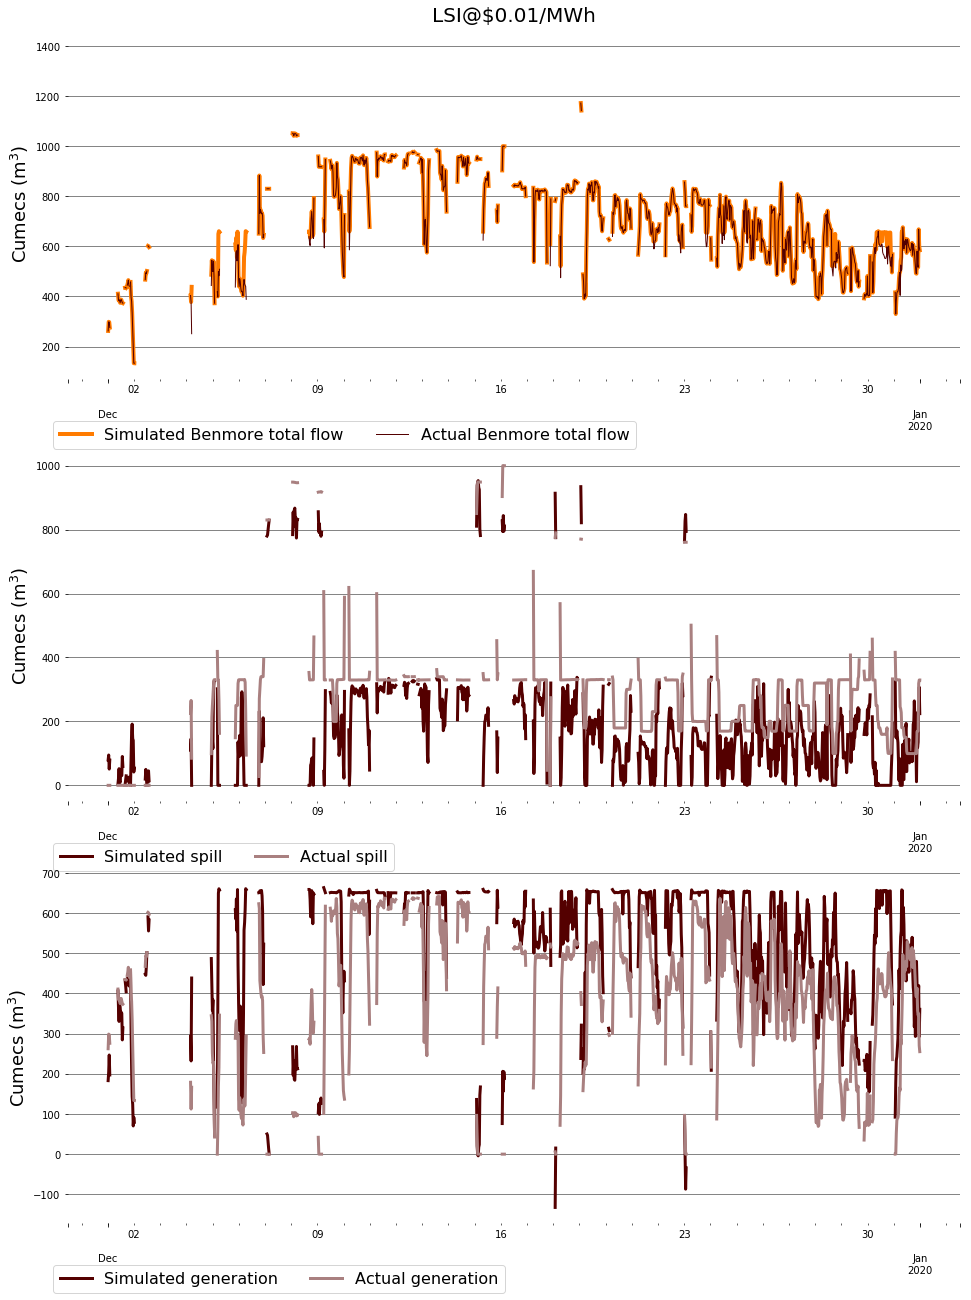

In [137]:
plot_ben_flows(BEN_CUMEC_new_001MWh, BEN_CUMEC_001MWh, 'LSI@$0.01/MWh')

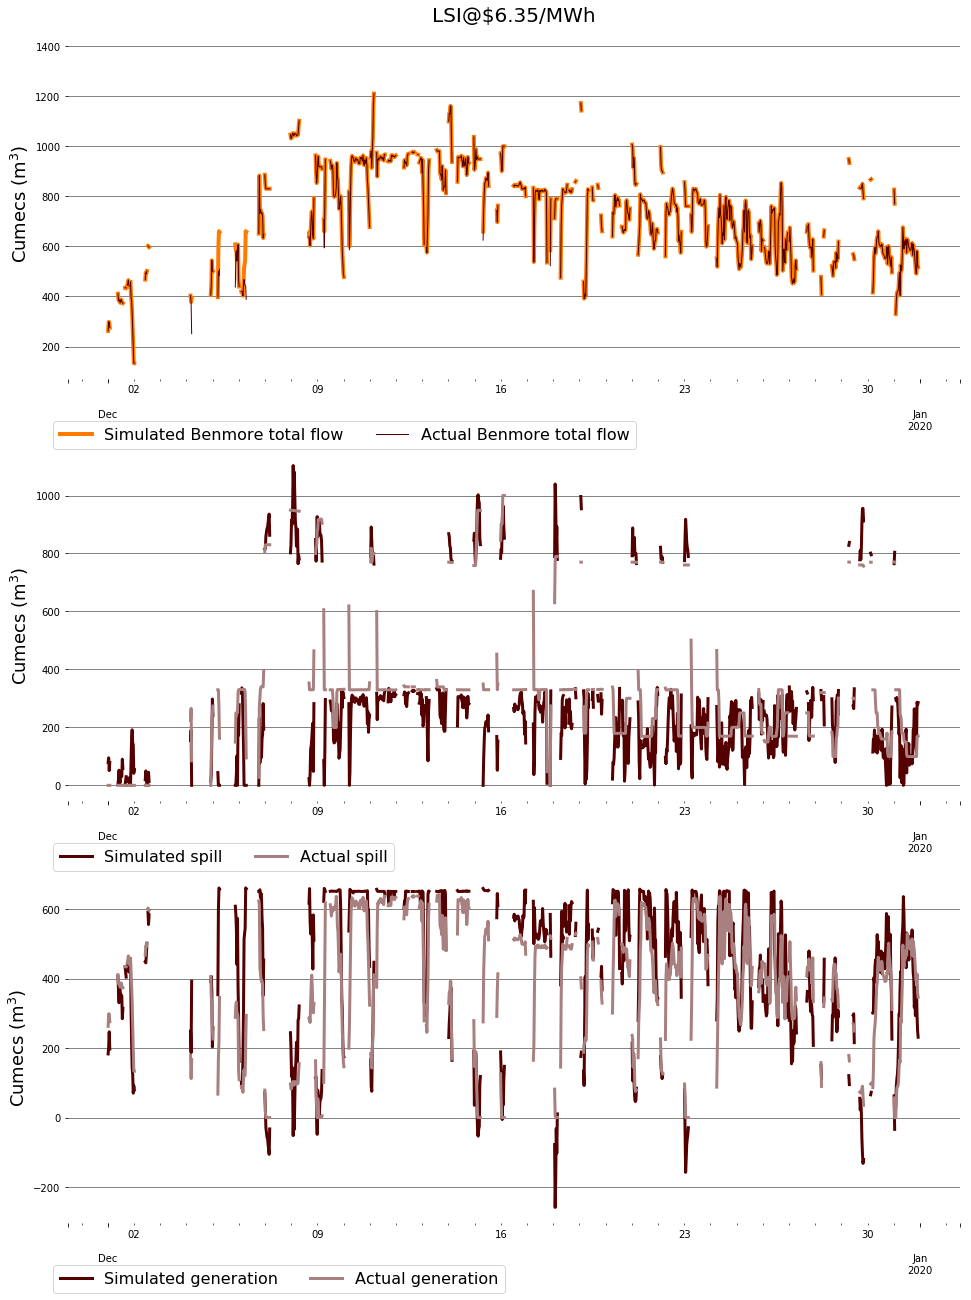

In [138]:
plot_ben_flows(BEN_CUMEC_new_6pt35, BEN_CUMEC_6pt35, 'LSI@$6.35/MWh')

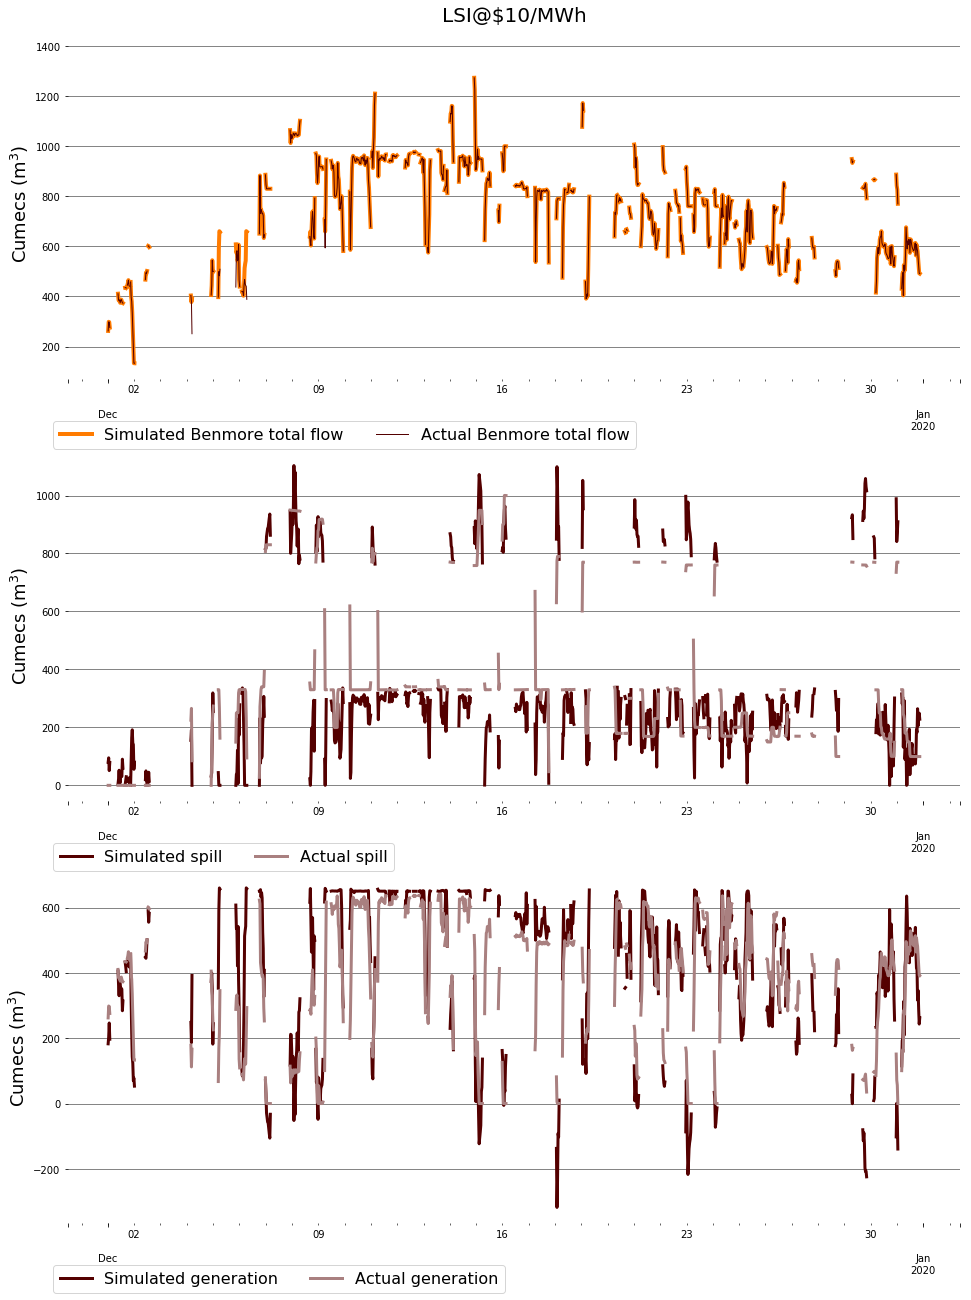

In [139]:
plot_ben_flows(BEN_CUMEC_new_10MWh, BEN_CUMEC_10MWh, 'LSI@$10/MWh')

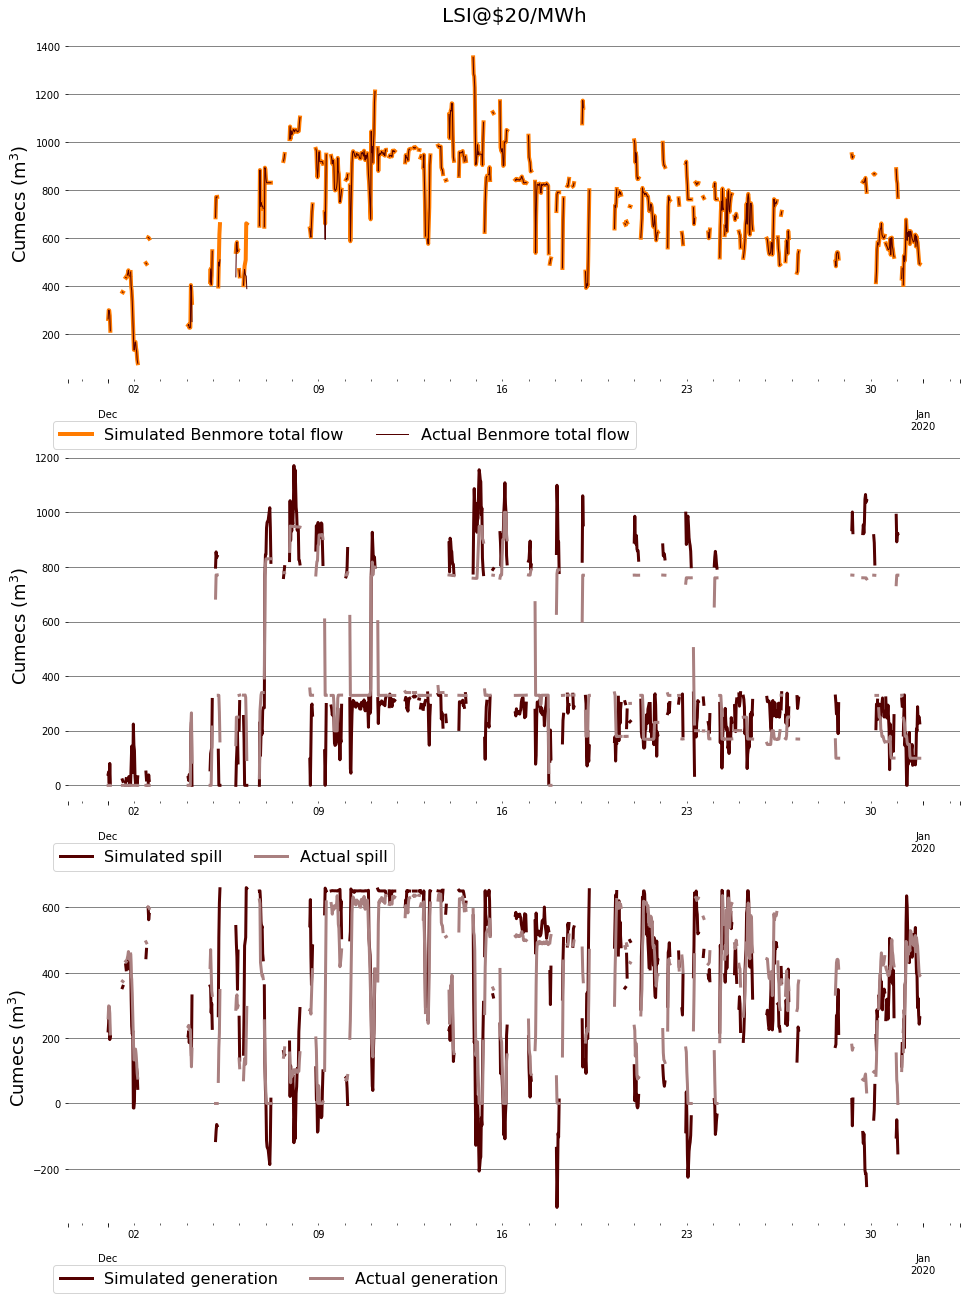

In [140]:
plot_ben_flows(BEN_CUMEC_new_20MWh, BEN_CUMEC_20MWh, 'LSI@$20/MWh')

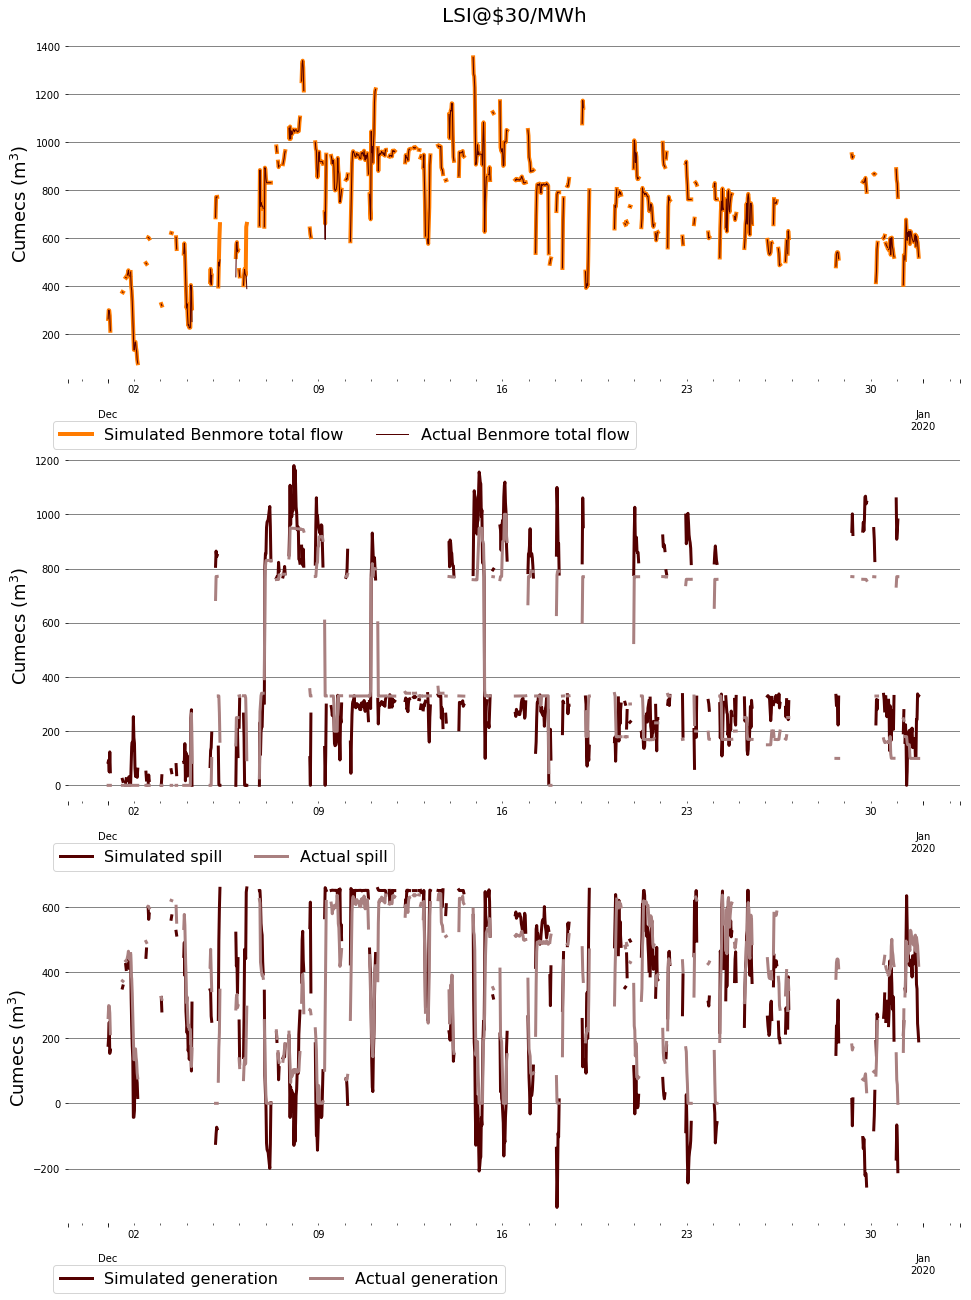

In [141]:
plot_ben_flows(BEN_CUMEC_new_30MWh, BEN_CUMEC_30MWh, 'LSI@$30/MWh')

Text(2020-01-01 00:00:00, 8.533740318885373, '11MW / 8.5GWh')

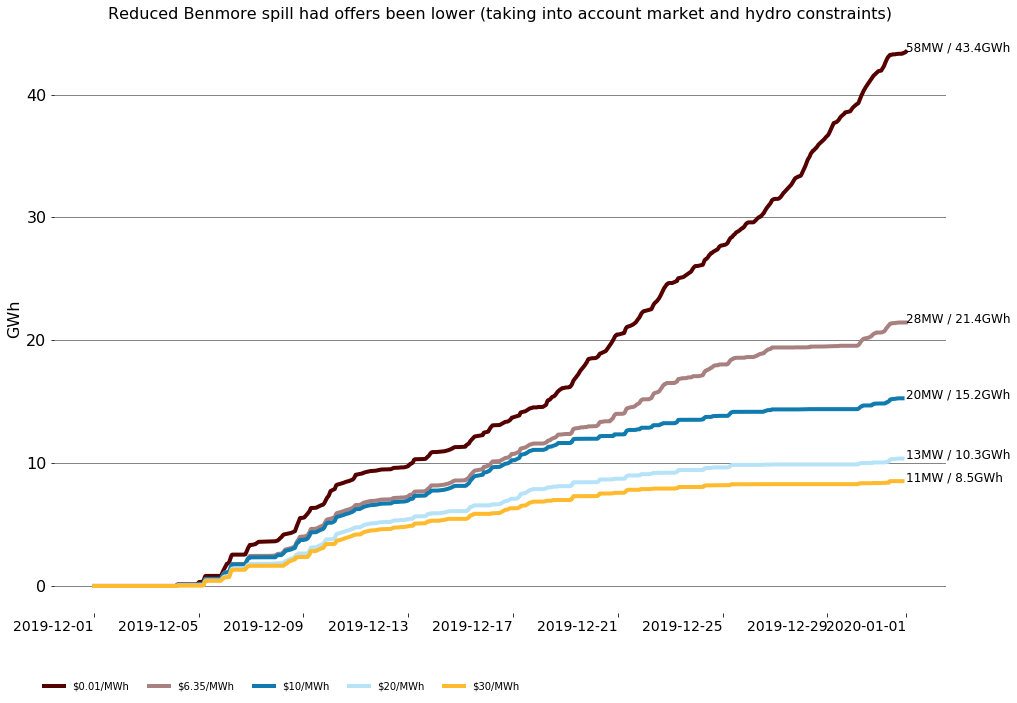

In [142]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)

add_spill_001MWh.cumsum().plot(ax=ax, label='$0.01/MWh', lw=4, fontsize=16)
add_spill_6pt35.cumsum().plot(ax=ax, label='$6.35/MWh', lw=4)
add_spill_10MWh.cumsum().plot(ax=ax, label='$10/MWh', lw=4)
add_spill_20MWh.cumsum().plot(ax=ax, label='$20/MWh', lw=4)
add_spill_30MWh.cumsum().plot(ax=ax, label='$30/MWh', lw=4)
legend_format(ax, cols=5)
plot_formatting(ax, fontsize=14)
ax.set_ylabel('GWh', fontsize=16)
ax.set_xlabel('')
ax.set_title('Reduced Benmore spill had offers been lower (taking into account market and hydro constraints)', fontsize=16)
ax.text(datetime(2020,1,1), add_spill_001MWh.cumsum()[-1], str(MW_spill_001MWh) + 'MW / ' + str(int(10*add_spill_001MWh.cumsum()[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1), add_spill_6pt35.cumsum()[-1], str(MW_spill_6pt35) + 'MW / ' + str(int(10*add_spill_6pt35.cumsum()[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1), add_spill_10MWh.cumsum()[-1], str(MW_spill_10MWh) + 'MW / ' + str(int(10*add_spill_10MWh.cumsum()[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1), add_spill_20MWh.cumsum()[-1], str(MW_spill_20MWh) + 'MW / ' + str(int(10*add_spill_20MWh.cumsum()[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1), add_spill_30MWh.cumsum()[-1], str(MW_spill_30MWh) + 'MW / ' + str(int(10*add_spill_30MWh.cumsum()[-1])/10) + 'GWh', fontsize=12)


Estimating raw vSPD run results to determine what price LSI generation would have been dispatched at to match 58MW of reduced spill.

Text(2019-12-30 00:00:00, 43.97988278167367, '43.4GWh')

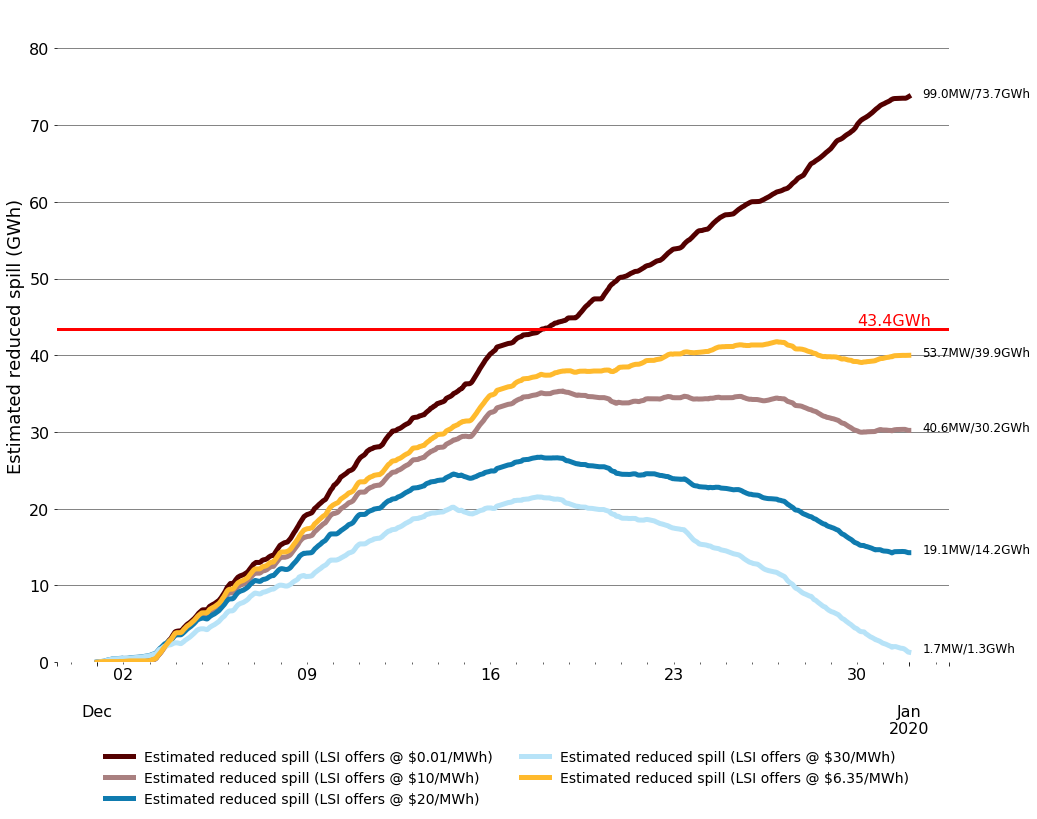

In [157]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
df["2019/12"].plot(lw=5, ax=ax, fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Estimated reduced spill (GWh)', fontsize=18)
ax.set_ylim([0, 85])
plot_formatting(ax)
legend_format(ax, fontsize=14, xpos=0.04, ypos=-.24, cols=2)
ax.text(datetime(2020,1,1,12), HVDC_diff_001MWh_cs[-1], str(int(10*HVDC_diff_001MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_001MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_6pt35_cs[-1], str(int(10*HVDC_diff_6pt35_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_6pt35_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_10MWh_cs[-1], str(int(10*HVDC_diff_10MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_10MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_20MWh_cs[-1], str(int(10*HVDC_diff_20MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_20MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.text(datetime(2020,1,1,12), HVDC_diff_30MWh_cs[-1], str(int(10*HVDC_diff_30MWh_cs[-1]*1000/24/31)/10) + 'MW/' + str(int(10*HVDC_diff_30MWh_cs[-1])/10) + 'GWh', fontsize=12)
ax.axhline(add_spill_001MWh.cumsum()[-1], lw=3, color='r')
ax.text(datetime(2019,12,30), add_spill_001MWh.cumsum()[-1]+0.5, str(int(10*add_spill_001MWh.cumsum()[-1])/10) + 'GWh', fontsize=16, color='r' )


On average, had LSI offers had been around \\$6.35/MWh we see around 53.7MW/39.9GWh of reduced SI spill throughout December 2019.  This is close to the result of the analysis above using the lower vSPD offer price of \\$0.01/MWh over all LSI generation and then dispatching this additional LSI generation at Benmore, but taking into account the Benmore spillway 'no-go' flow constraints.  Doing this resulted in around 58MW/43.4GWh of additional spill at Benmore over December 2019.  



Text(28, 40.5, '39.9GWh')

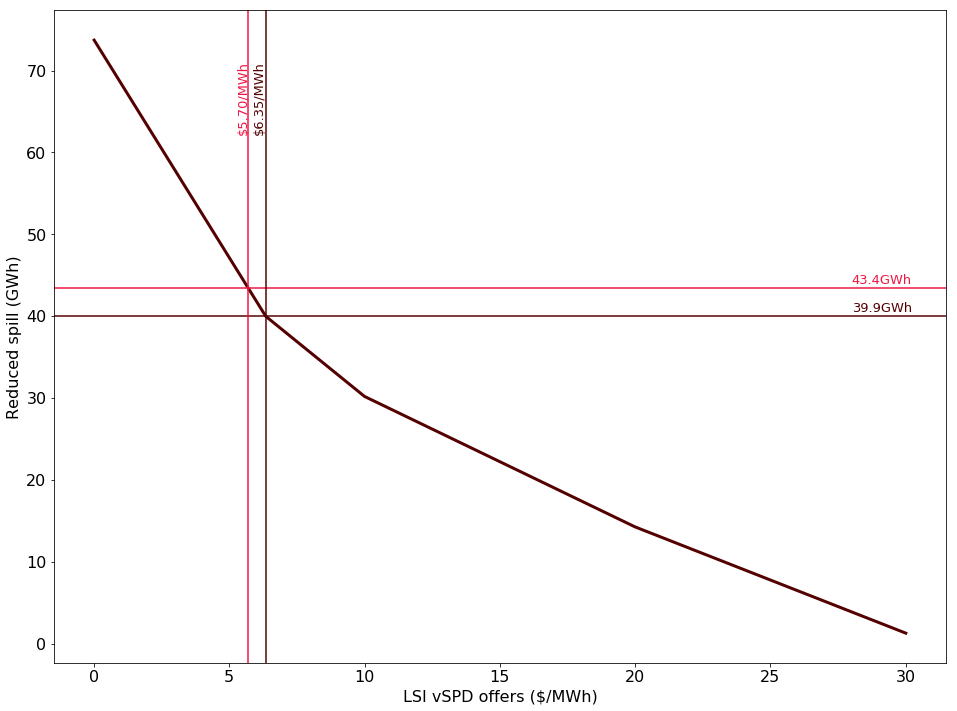

In [218]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
proxy_spill =df["2019/12"].iloc[-1].sort_values()
proxy_spill.index=[30, 20, 10, 6.35, 0.01]
proxy_spill.plot(ax=ax, lw=3, fontsize=16)
ax.axhline(add_spill_001MWh.cumsum()[-1], color=c_p['rd1'])
ax.axhline(HVDC_diff_6pt35_cs[-1])
ax.axvline(6.35)
ax.axvline(5.7, color=c_p['rd1'])
ax.set_xlabel('LSI vSPD offers ($/MWh)', fontsize=16)
ax.set_ylabel('Reduced spill (GWh)', fontsize=16)

str(int(10*HVDC_diff_6pt35_cs[-1])/10) + 'GWh'


ax.text(5.3, 70, '$5.70/MWh', rotation=90, fontsize=13, color=c_p['rd1'])
ax.text(5.86, 70, '$6.35/MWh', rotation=90, fontsize=13, color=c_p['br1'])
ax.text(28, 44, str(int(10*add_spill_001MWh.cumsum()[-1])/10) + 'GWh', rotation=0, fontsize=13, color=c_p['rd1'])
ax.text(28, 40.5, str(int(10*HVDC_diff_6pt35_cs[-1])/10) + 'GWh', rotation=0, fontsize=13, color=c_p['br1'])

Linear interpolation of these results (illustrated below) suggests that had LSI generators offered slightly lower than \\$6.35 (at \\$5.70/MWh) then this may have resulted in a closed match between the two different spill analyses.

